# Домашнее Задание 4.
Дедлайн - 8 июня 23:59 по МСК (GMT+3).

Форма сдачи - jupyter notebook. 
Сдавать в [классрум](https://classroom.google.com/c/NjYxNjY4MjY3NDIw?cjc=pho754c)

P.S Пожалуйста, аккуратно оформляйте графики, ориентироваться можно на этот [материал](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem02-charts.ipynb). У графиков обязательно должно быть:

- Название
- Подписанные оси
- Легенда, если необходимо (например, если несколько цветов на одном графике)
- Все должно быть четко видно и ничего не сливаться
Непонятные и неаккуратные графики могут негативно сказаться на оценке

Также нельзя использовать готовые решения задач: например, если вам нужно решить СЛУ, то запрещено использовать numpy.linalg.solve, иначе 0 баллов. За неэффективное использование циклов также могут быть нежелательным - используйте векторные операции.

Все задачи весят одинаково

In [1]:
import numpy as np
import matplotlib
matplotlib.rcParams['image.cmap'] = 'jet'
import matplotlib.pyplot as plt
from numba import jit
%matplotlib inline

In [2]:
def compute_target_function_pr1(x):
    return np.cos(np.pi * (x - 0.25 * x * x))


def compute_target_first_derivative_function_pr1(x):
    return np.pi * (x - 2.0) * np.sin(np.pi * (x - 0.25 * x * x)) / 2.0


def compute_target_second_derivative_function_pr1(x):
    term1 = np.pi * (x - 2.0) * (x - 2.0) * np.cos(np.pi * (x - 0.25 * x * x))
    term2 = 2.0 * np.sin(np.pi * (x - 0.25 * x * x))

    return -np.pi * (term1 - term2) / 4.0


def compute_target_function_derivative(x, ord_der: int):
    if ord_der == 0:
        return compute_target_function_pr1(x)
    if ord_der == 1:
        return compute_target_first_derivative_function_pr1(x)
    if ord_der == 2:
        return compute_target_second_derivative_function_pr1(x)
    return None


def generate_interpolation_nodes_uniform(segment: list[float], count_nodes: int) -> np.ndarray:
    return np.linspace(segment[0], segment[1], count_nodes)


def generate_interpolation_nodes_random(segment: list[float], count_nodes: int) -> np.ndarray:
    return np.sort(np.random.uniform(segment[0], segment[1], count_nodes))


def generate_test_points(segment: list[float], count_nodes: int = 1000) -> (np.ndarray, np.ndarray):
    x = np.linspace(segment[0], segment[1], count_nodes + 1)
    y = compute_target_function_pr1(x)
    return x, y


def compute_inaccuracy(true_values, predict_values):
    return np.sqrt(np.mean((true_values - predict_values) ** 2))

# Задача 1

Пусть задана функция 
$$
f(x) = \cos\big(\pi(x - 1/4 x^2)\big)
$$ на отрезке $[-1; 1]$. Значения функции известны в точках: $x_1, ..., x_n$: $y_1 = f(x_1), ... , f(x_n)$.

Интерполяционный многочлен для данной функции может быть построен в форме Лагранжа:
$$
p(x) = \sum_{i=1}^{n} y_i l_i(x)
$$
Здесь $l_i(x)$ - многочлены Лагранжа:
$$
L_i(x) = \frac{\prod_{j \neq i} (x - x_j)}{\prod_{j \neq i} (x_i - x_j)}
$$

Задание состоит в следующем:

1) Реализуйте функцию, которая вычисляет знамения произвольного многочлена Лагранжа $l_i(x)$ в произвольной точке $x$

2) Реализуйте функцию, которая вычисляет значение интерполяционного многочлена в форме Лагранжа в произвольной точке

3) Вычислите ошибку аппроксимации функции интерполяционным многочленом:
$$
r = \sqrt{\frac{1}{N} \sum_{j=1}^{N} (\left(\xi_j) - p(\xi_j)\right)^2}
$$
здесь $N$ - число точек в выборке для валидации: $\xi_1, ... , \xi_N$

4) Постройте график, $f(x)$ и $p(x)$ при $x \in [-1, 2]$

5) Сравните ошибку $r$ для случая равномерной и случайной генерации узлов интерполяции $x_1, ..., x_n$

В пунктах 3 - 5 рассмотрите случаи $n = 3, 5, 10, 15$.

In [3]:
class LagrangePoly:
    """
    You are not allowed to use a for-loop over x
    """

    def __init__(self, nodes: np.ndarray, values: np.ndarray):
        self.nodes = nodes.copy()
        self.values = values.copy()

    def compute_lagrange_basis(self, x: np.ndarray, i: int):
        """
        x: points for which to compute the basis polynomial
        """
        
        nodes = np.delete(self.nodes, i)
        xi = self.nodes[i]

        basis = np.prod((x[:, None] - nodes) / (xi - nodes), axis=1)
        return basis

    def predict(self, x: np.ndarray):
        """
        x: points for which to compute the interpolation value
        return: interpolation values at the point x
        """
        interpolation = np.sum([self.values[i] * self.compute_lagrange_basis(x, i) for i in range(len(self.nodes))], axis=0)
        return interpolation

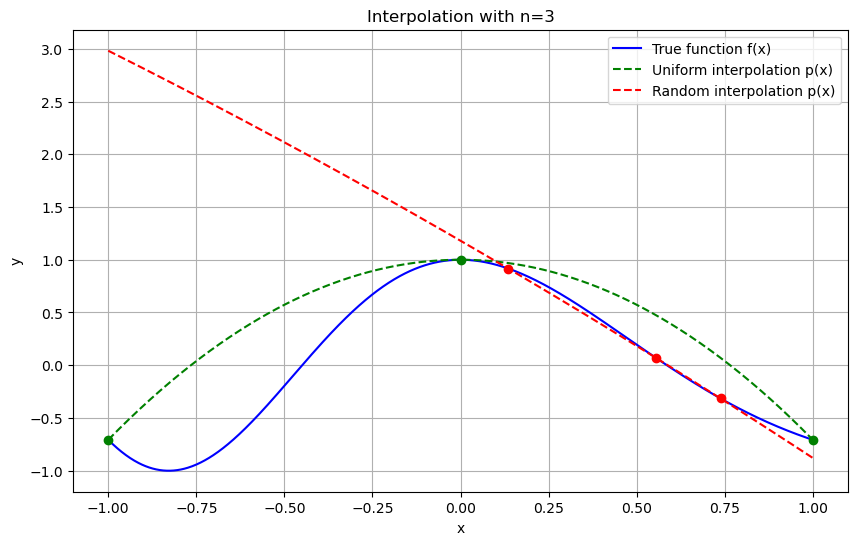

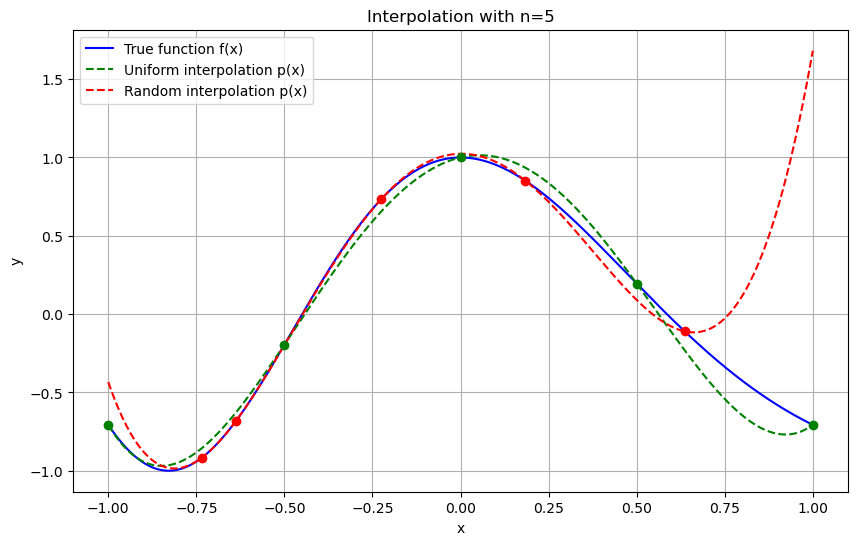

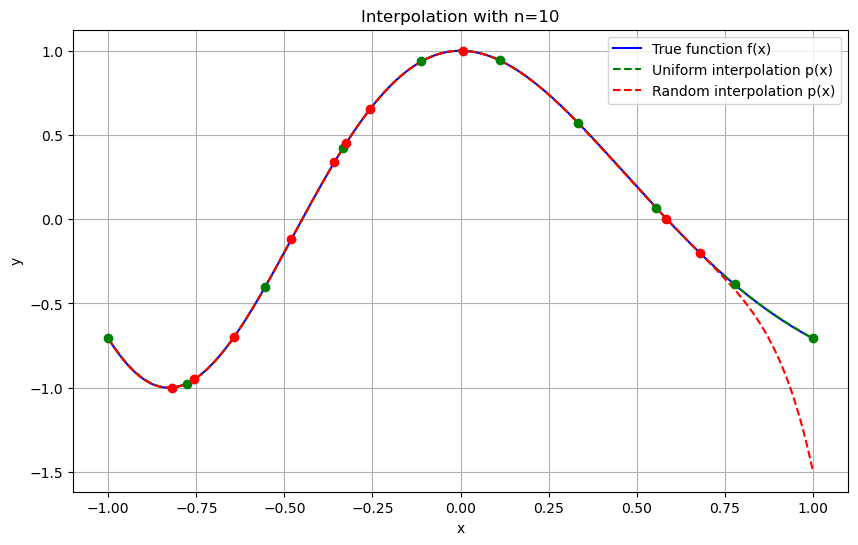

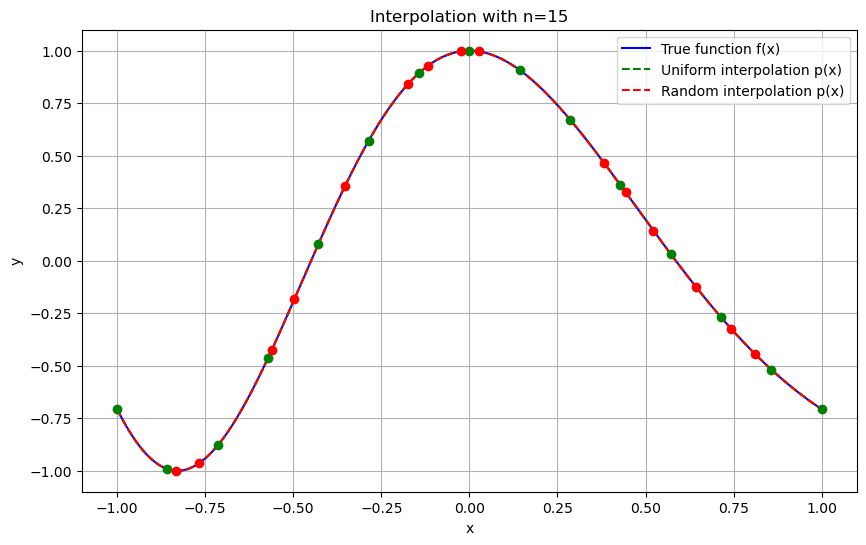

In [4]:
import pandas as pd

def solve_problem_1():
    segment = [-1, 1]
    n_values = [3, 5, 10, 15]

    results = []

    for n in n_values:
        uniform_nodes = generate_interpolation_nodes_uniform(segment, n)
        random_nodes = generate_interpolation_nodes_random(segment, n)

        uniform_values = compute_target_function_pr1(uniform_nodes)
        random_values = compute_target_function_pr1(random_nodes)

        x_test, y_true = generate_test_points(segment)

        uniform_poly = LagrangePoly(uniform_nodes, uniform_values)
        random_poly = LagrangePoly(random_nodes, random_values)

        y_uniform_pred = uniform_poly.predict(x_test)
        y_random_pred = random_poly.predict(x_test)

        uniform_error = compute_inaccuracy(y_true, y_uniform_pred)
        random_error = compute_inaccuracy(y_true, y_random_pred)

        results.append((n, uniform_error, random_error))

        plt.figure(figsize=(10, 6))
        plt.plot(x_test, y_true, label='True function f(x)', color='blue')
        plt.plot(x_test, y_uniform_pred, label='Uniform interpolation p(x)', linestyle='--', color='green')
        plt.plot(x_test, y_random_pred, label='Random interpolation p(x)', linestyle='--', color='red')
        plt.scatter(uniform_nodes, uniform_values, color='green', zorder=5)
        plt.scatter(random_nodes, random_values, color='red', zorder=5)
        plt.title(f'Interpolation with n={n}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()

    df_results = pd.DataFrame(results, columns=['n', 'Uniform Error', 'Random Error'])
    return df_results

df_results = solve_problem_1()

In [5]:
print(df_results)

    n  Uniform Error  Random Error
0   3       0.491203      1.791197
1   5       0.091543      0.464037
2  10       0.000980      0.114612
3  15       0.000001      0.000019


# Задача 2.
Для функции из задачи 1 постройте интерполяциооный многочлен в форме Ньютона.

Как ведет себя ошибка интерполяции с ростом числа узлов (степени интерполяционного многочлена)?

Подразумевется, что функция, для которой строитс интерполяция, определена на отрезке $[-1; 1]$

## Комментарий.
Интерполяционный многочлен в форме Ньютона выглядит следующим обраозм:
$$
p(x) = f[x_0] + f[x_0, x_1] (x - x_0) + ... + f_[x_0, ... , x_n] (x - x_0) ... (x - x_{n-1})
$$
$f[x_i, ... , x_j]$ - разделенные разности, которые могут быть вычислены рекурсивно:
$$
f[x_i] = y_i
$$
$y_i$ - значение функции в узлах интерполяции
$$
f[x_i, ..., x_j] = \frac{f[x_{i + 1}, ..., x_j] - f[x_i, ..., x_{j - 1}]}{x_j - x_i}
$$

Для алгоритма НЕ существенен порядок узлов интерполяции.


Фактически, в задаче требуется реализовать функцию, которая вычисляет разделенные разности для интерполяционного многочлена, и фукцию, которая вычисляет значение интерполяционного многочлена в заданной точке.


In [6]:
class NewtonPoly:
    """
    You are not allowed to use a for-loop over x
    """

    def __init__(self, nodes: np.ndarray, values: np.ndarray):
        self.nodes = nodes.copy()
        self.values = values.copy()
        self.coef_ = self.divided_differences()

    def divided_differences(self):
        """
        Compute divided differences
        :return: polynomial coefficients  
        """
        n = len(self.nodes)
        coef = np.zeros((n, n))
        coef[:, 0] = self.values

        # Таблица разделенных разностей
        for j in range(1, n):
            coef[:n-j, j] = (coef[1:n-j+1, j-1] - coef[:n-j, j-1]) / (self.nodes[j:] - self.nodes[:-j])

        return coef[0, :]

    def predict(self, x: np.ndarray):
        """
        x: points for which to compute the interpolation value
        return: interpolation values at the point x
        """
        x = np.atleast_1d(x)
        n = len(self.coef_)
        terms = np.subtract.outer(x, self.nodes[:-1])
        terms = np.cumprod(np.column_stack((np.ones_like(x), terms)), axis=1)
        return np.dot(terms, self.coef_)

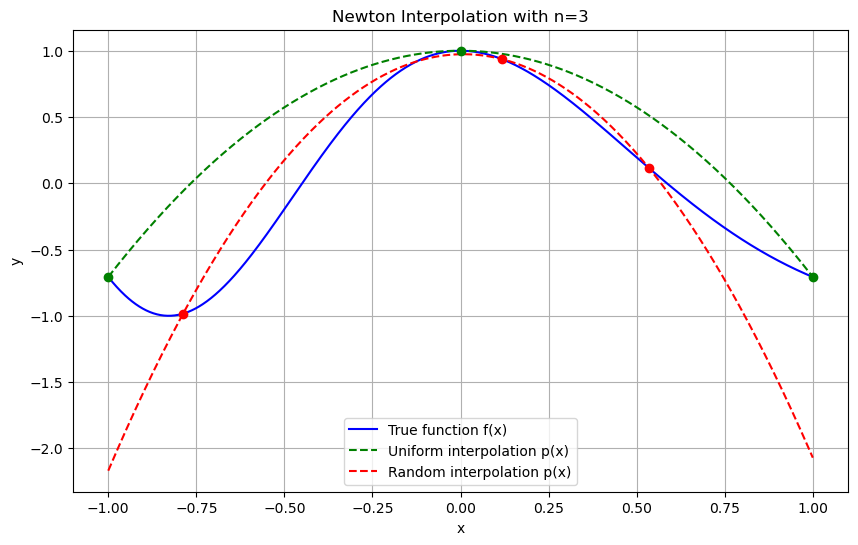

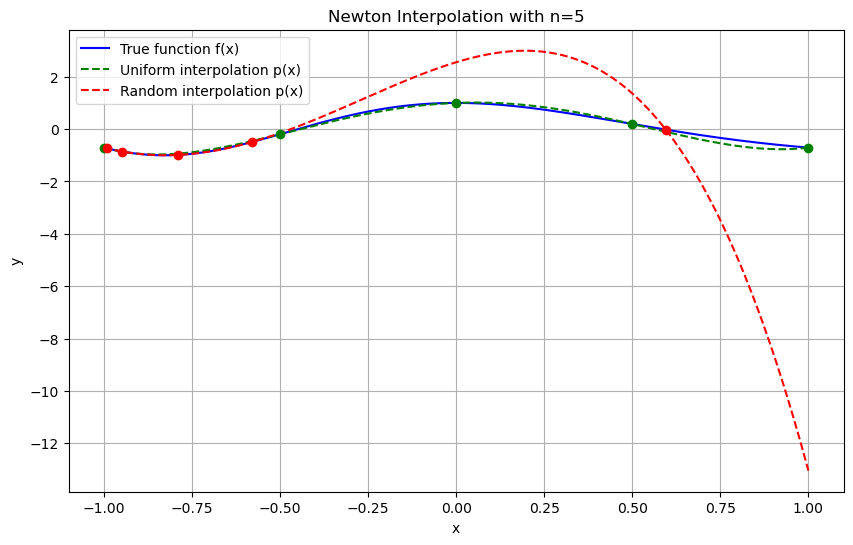

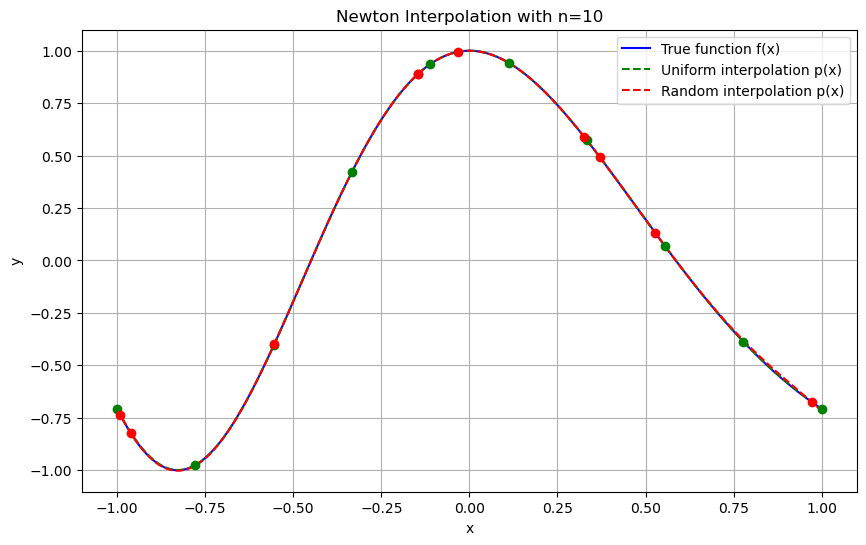

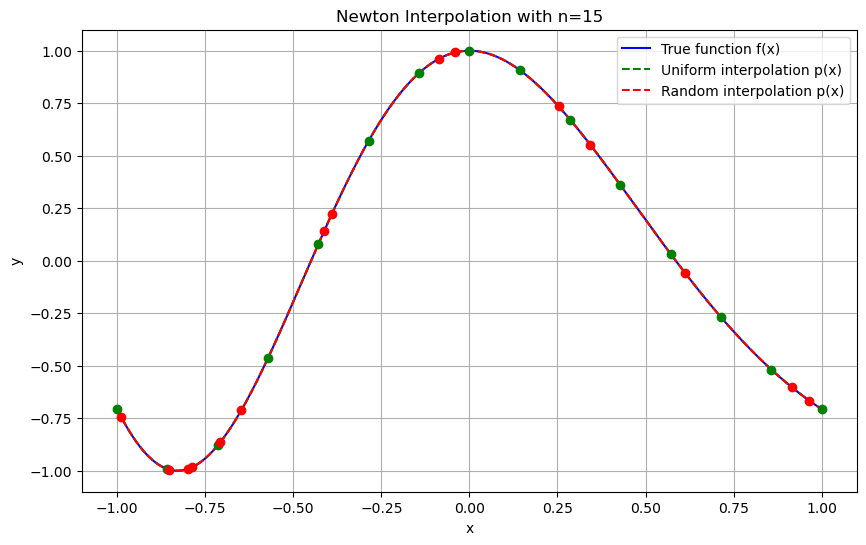

In [7]:
import pandas as pd

def solve_problem_2():
    segment = [-1, 1]
    n_values = [3, 5, 10, 15]

    results = []

    for n in n_values:
        uniform_nodes = generate_interpolation_nodes_uniform(segment, n)
        random_nodes = generate_interpolation_nodes_random(segment, n)

        uniform_values = compute_target_function_pr1(uniform_nodes)
        random_values = compute_target_function_pr1(random_nodes)

        x_test, y_true = generate_test_points(segment)

        uniform_poly = NewtonPoly(uniform_nodes, uniform_values)
        random_poly = NewtonPoly(random_nodes, random_values)

        y_uniform_pred = uniform_poly.predict(x_test)
        y_random_pred = random_poly.predict(x_test)

        uniform_error = compute_inaccuracy(y_true, y_uniform_pred)
        random_error = compute_inaccuracy(y_true, y_random_pred)

        results.append((n, uniform_error, random_error))

        plt.figure(figsize=(10, 6))
        plt.plot(x_test, y_true, label='True function f(x)', color='blue')
        plt.plot(x_test, y_uniform_pred, label='Uniform interpolation p(x)', linestyle='--', color='green')
        plt.plot(x_test, y_random_pred, label='Random interpolation p(x)', linestyle='--', color='red')
        plt.scatter(uniform_nodes, uniform_values, color='green', zorder=5)
        plt.scatter(random_nodes, random_values, color='red', zorder=5)
        plt.title(f'Newton Interpolation with n={n}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()

    df_results = pd.DataFrame(results, columns=['n', 'Uniform Error', 'Random Error'])
    return df_results

df_results = solve_problem_2()

In [8]:
print(df_results)

    n  Uniform Error  Random Error
0   3       0.491203      0.433279
1   5       0.091543      2.981798
2  10       0.000980      0.002986
3  15       0.000001      0.000027


# Задача 3.
В данной задаче предлагается решить проблему интерполяцию Эрмита для функции из задачи 1.
Необходимо построить интерполяционный многочлен в форме Ньютона.



Как ведет себя ошибка интерполяции с ростом числа узлов (степени интерполяционного многочлена)?

Рассмотрите 3 случая:
1) даны только значения функции в узлах интерполяции
2) даны значения и первые производные в узлах интерполяции
3) даны значения, первые и вторые производные в узлах интерполяции

Подразумевается, что функция, для которой строится интерполяция, определена на отрезке $[-1; 1]$

## Комментарий.
Интерполяционный многочлен в форме Ньютона выглядит следующим образом:
$$
p(x) = f[x_0] + f[x_0, x_1] (x - x_0) + ... + f_[x_0, ... , x_n] (x - x_0) ... (x - x_{n-1})
$$
$f[x_i, ... , x_j]$ - разделенные разности, которые могут быть вычислены рекурсивно:
$$
f[x_i] = y_i
$$
$y_i$ - значение функции в узлах интерполяции
Если $x_i \neq x_j$:
$$
f[x_i, ..., x_j] = \frac{f[x_{i + 1}, ..., x_j] - f[x_i, ..., x_{j - 1}]}{x_j - x_i}
$$
В противном случае:
$$
f[x_i, ..., x_j] = \frac{\partial^{j - i} f(x)}{\partial x ^{j - i}}(x_i)
$$


Для алгоритма СУЩЕСТВЕНЕН порядок узлов интерполяции - входные данные (узлы интерполяции) следует упорядочить (по возрастанию).


Фактически, в задаче требуется реализовать функцию, которая вычисляет разделенные разности для интерполяционного многочлена, и функцию, которая вычисляет значение интерполяционного многочлена в заданной точке.

In [9]:
class NewtonDerivativePoly:
    """
    You are not allowed to use a for-loop over x
    """

    def __init__(self, nodes: np.ndarray, values: np.ndarray, max_der_order: int):
        self.nodes = nodes.copy()
        self.values = values.copy()
        self.max_der_order = max_der_order
        self.coef_ = self.divided_differences(max_der_order=max_der_order)

    def divided_differences(self, max_der_order: int):
        """
        Compute divided differences for Hermite interpolation.
        :return: polynomial coefficients
        """
        n = len(self.nodes)
        m = n * self.max_der_order
        coef = np.zeros((m, m))

        z = np.repeat(self.nodes, self.max_der_order)
        f = np.zeros(m)

        for j in range(self.max_der_order):
            f[j::self.max_der_order] = compute_target_function_derivative(self.nodes, j)

        for i in range(n):
            coef[i*self.max_der_order:(i+1)*self.max_der_order, 0] = self.values[i]

        
        for idx_col in range(1, m):
            for idx_row in range(0, m - idx_col):
                if np.absolute(z[idx_row + idx_col] - z[idx_row]) > 1e-6:
                    divv = coef[idx_row + 1, idx_col - 1] - coef[idx_row, idx_col - 1]
                    diff = z[idx_row + idx_col] - z[idx_row]
                    coef[idx_row, idx_col] = divv / diff
                else:
                    coef[idx_row, idx_col] = compute_target_function_derivative(z[idx_row + idx_col], idx_col) / np.math.factorial(idx_col)

        

        return coef[0, :]
        
    def predict(self, x: np.ndarray, ):   
        """
        x: points for which to compute the interpolation value.
        return: interpolation values at the points x.
        """
        z = np.repeat(self.nodes, self.max_der_order)
        coef = self.coef_

        y = coef[0] + 0.0 * x
        x_prod = 1.0 + 0.0 * x

        for idx in range(1, len(coef)):
            x_prod *= (x - z[idx - 1])
            y += coef[idx] * x_prod

        return y


/var/folders/fz/v54zc99901z8xy9l3zwwx4140000gn/T/ipykernel_44222/1001030993.py:38: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  coef[idx_row, idx_col] = compute_target_function_derivative(z[idx_row + idx_col], idx_col) / np.math.factorial(idx_col)


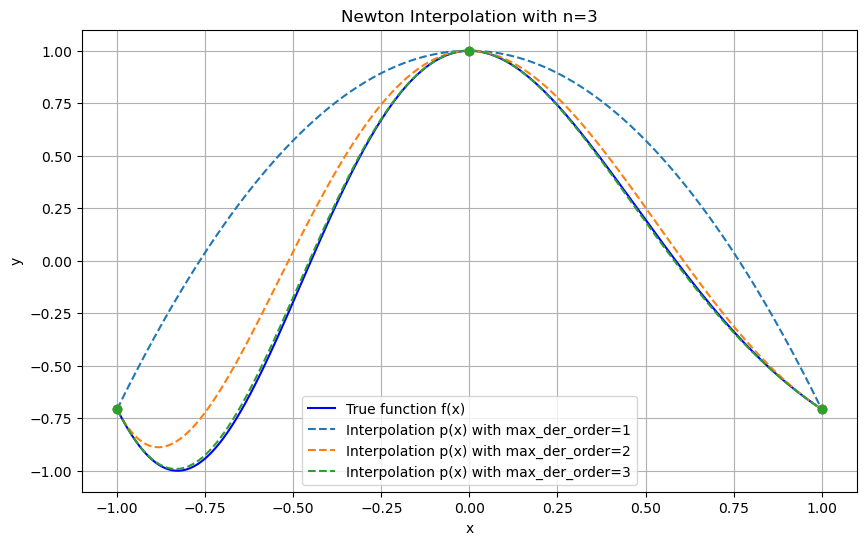

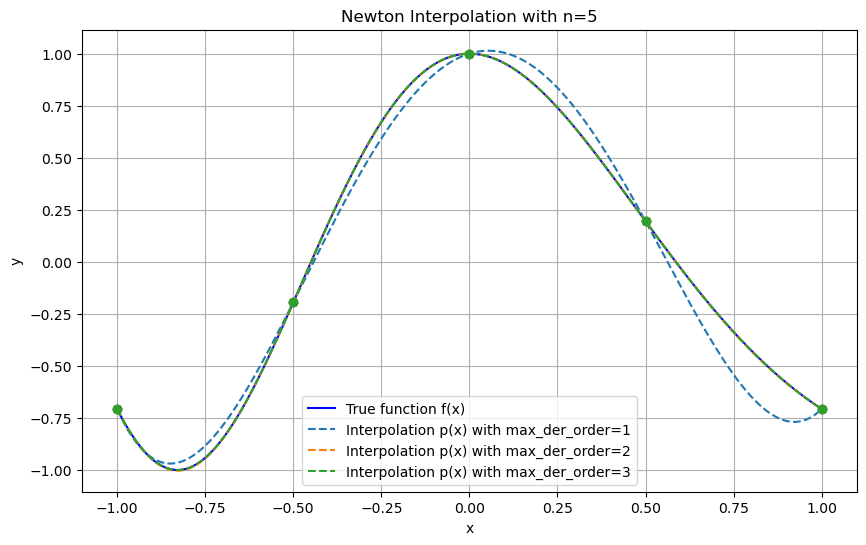

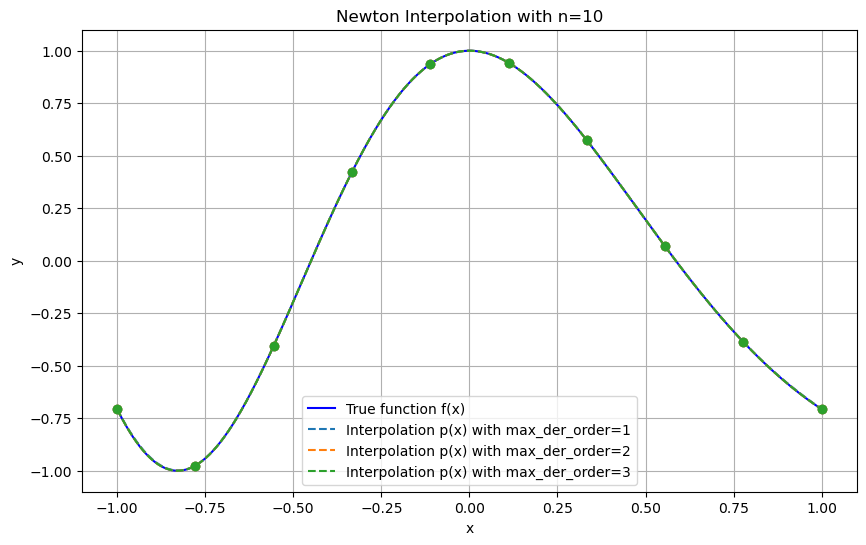

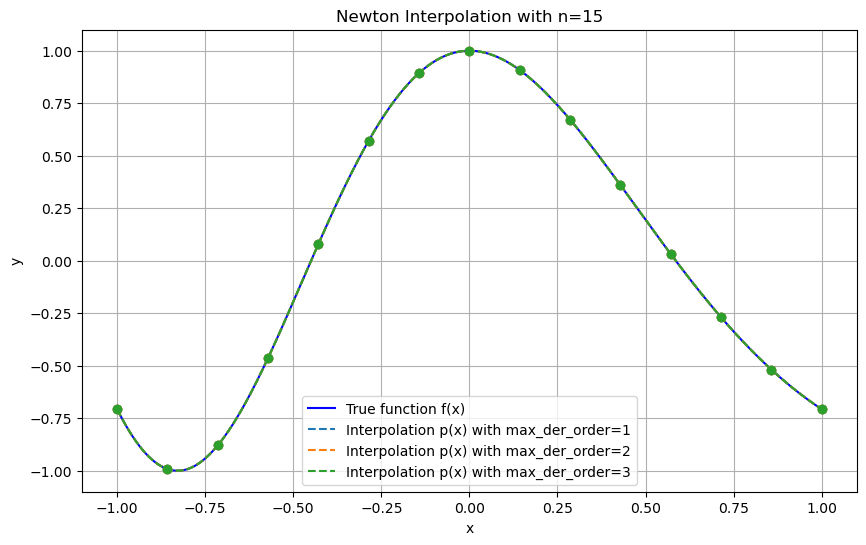

In [10]:
# Solve problem 3
def solve_problem_3():
    segment = [-1, 1]
    n_values = [3, 5, 10, 15]
    max_der_orders = [1, 2, 3]  # Corresponding to the three cases

    results = []

    for n in n_values:
        plt.figure(figsize=(10, 6))
        x_test, y_true = generate_test_points(segment)
        plt.plot(x_test, y_true, label='True function f(x)', color='blue')

        for max_der_order in max_der_orders:
            nodes = generate_interpolation_nodes_uniform(segment, n)
            values = compute_target_function_pr1(nodes)
            
            if max_der_order > 1:
                values = np.concatenate([values, np.zeros_like(nodes)])
            if max_der_order > 2:
                values = np.concatenate([values, np.zeros_like(nodes)])
            
            poly = NewtonDerivativePoly(nodes, values, max_der_order)
            y_pred = poly.predict(x_test)
    
            error = compute_inaccuracy(y_true, y_pred)
            results.append((max_der_order, n, error))
    
            plt.plot(x_test, y_pred, label=f'Interpolation p(x) with max_der_order={max_der_order}', linestyle='--')
            plt.scatter(nodes, compute_target_function_pr1(nodes), zorder=5)
        
        plt.title(f'Newton Interpolation with n={n}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()

    df_results = pd.DataFrame(results, columns=['Max Derivative Order', 'n', 'Error'])
    return df_results

# Running the solve_problem_3 function
df_results = solve_problem_3()

In [11]:
print(df_results)

    Max Derivative Order   n         Error
0                      1   3  4.912033e-01
1                      2   3  1.197432e-01
2                      3   3  1.056839e-02
3                      1   5  9.154275e-02
4                      2   5  1.299771e-03
5                      3   5  1.519446e-06
6                      1  10  9.804491e-04
7                      2  10  8.761322e-10
8                      3  10  2.224541e-14
9                      1  15  1.247194e-06
10                     2  15  5.057537e-14
11                     3  15  1.358560e-10


# Задача 4.
В данной задаче предлагается решить аппроксимировать функцию из задачи 1 при помощи кубических сплайнов.

Как ведет себя ошибка интерполяции с ростом числа интервалов, используемых для интерполяции?

Фактически, в задаче требуется реализовать функцию, которая вычисляет параметры интерполяции при помощи сплайнов, и функцию, которая вычисляет значение интерполирующей функции в заданной точке.

In [12]:
class NaturalSpline:
    def __init__(self, nodes: np.ndarray, values: np.ndarray):
        self.nodes = nodes.copy()
        self.values = values.copy()
        self.second_derivatives = self.compute_second_deriv_vector()

    def locate_argument(self, x):
        return np.searchsorted(self.nodes, x) - 1

    @staticmethod
    def compute_cubic_spline_value(x_prev, x_curr, second_derivative_prev, second_derivative_curr, y_prev, y_curr, x):
        h = x_curr - x_prev
        a = (x_curr - x) / h
        b = (x - x_prev) / h
        return (
            a * y_prev +
            b * y_curr +
            ((a ** 3 - a) * second_derivative_prev + (b ** 3 - b) * second_derivative_curr) * (h ** 2) / 6
        )

    def predict(self, x: np.ndarray):
        results = np.zeros_like(x)
        for i, val in enumerate(x):
            if val <= self.nodes[0]:
                results[i] = self.values[0]
            elif val >= self.nodes[-1]:
                results[i] = self.values[-1]
            else:
                idx = self.locate_argument(val)
                results[i] = self.compute_cubic_spline_value(
                    self.nodes[idx], self.nodes[idx + 1],
                    self.second_derivatives[idx], self.second_derivatives[idx + 1],
                    self.values[idx], self.values[idx + 1],
                    val
                )
        return results

    def compute_system_matrix(self):
        n = len(self.nodes)
        h = np.diff(self.nodes)
        A = np.zeros((n, n))
        A[0, 0] = A[-1, -1] = 1

        off_diag = np.zeros((n-2,))
        off_diag[:] = h[:-1] / (h[:-1] + h[1:])
        np.fill_diagonal(A[1:-1, :-2], off_diag)
        np.fill_diagonal(A[1:-1, 2:], 1 - off_diag)
        np.fill_diagonal(A[1:-1, 1:-1], 2)

        return A

    def compute_right_part(self):
        n = len(self.nodes)
        h = np.diff(self.nodes)
        b = np.zeros(n)

        dydx = np.diff(self.values) / h
        b[1:-1] = 6 * (dydx[1:] - dydx[:-1]) / (h[:-1] + h[1:])

        return b

    def compute_second_deriv_vector(self):
        A = self.compute_system_matrix()
        b = self.compute_right_part()
        return np.linalg.solve(A, b)

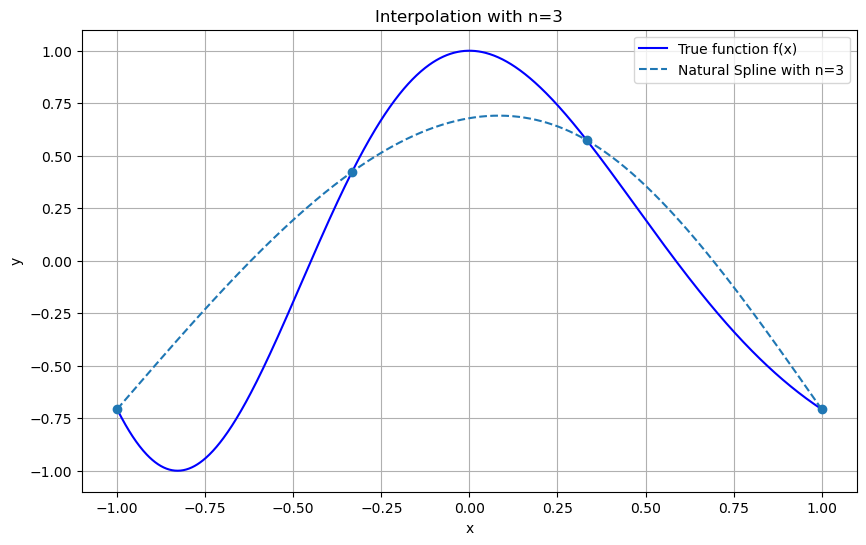

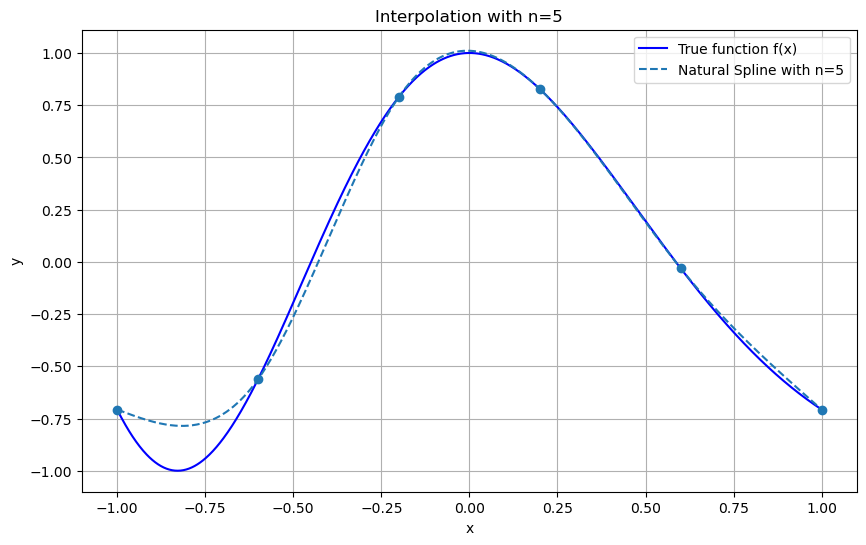

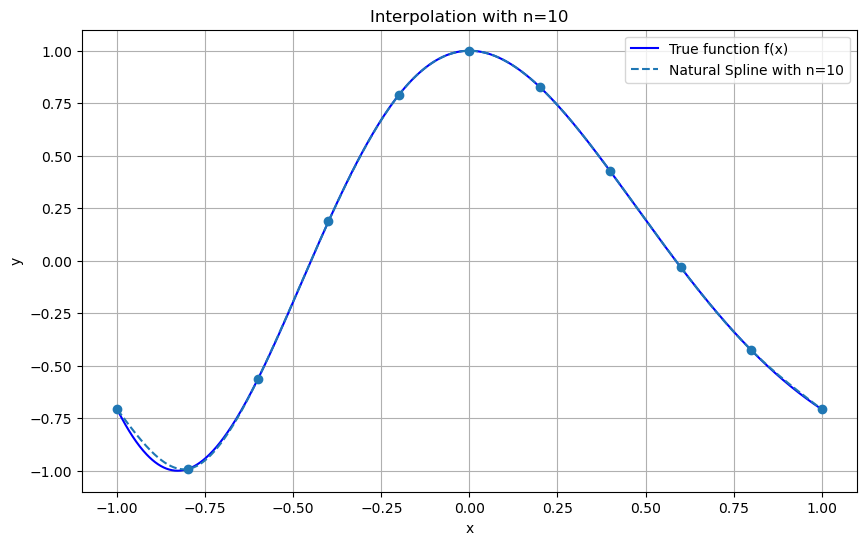

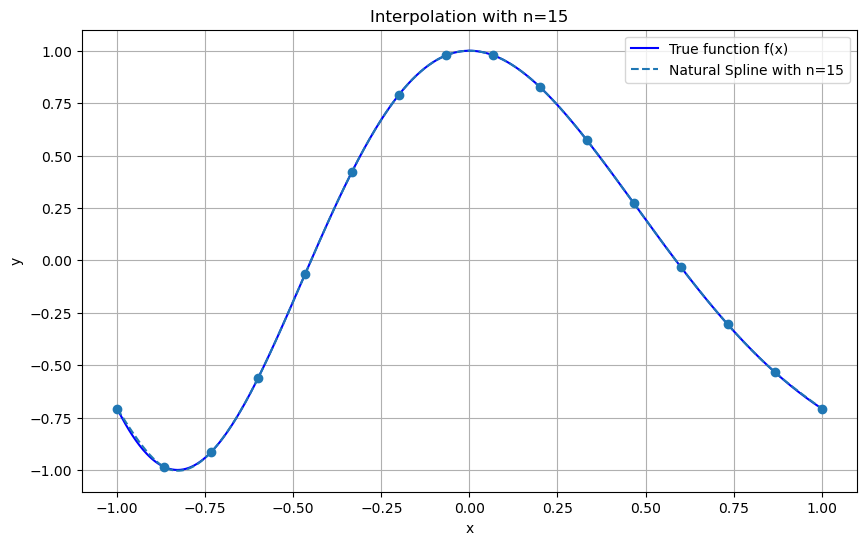

In [13]:
def solve_task_4():
    segment = [-1, 1]
    n_values = [3, 5, 10, 15]
    results = []

    for n in n_values:
        plt.figure(figsize=(10, 6))
        x_test, y_true = generate_test_points(segment)
        plt.plot(x_test, y_true, label='True function f(x)', color='blue')

        nodes = generate_interpolation_nodes_uniform(segment, n + 1)
        values = compute_target_function_pr1(nodes)

        spline = NaturalSpline(nodes, values)
        y_pred = spline.predict(x_test)
        
        error = compute_inaccuracy(y_true, y_pred)
        results.append((n, error))

        plt.plot(x_test, y_pred, label=f'Natural Spline with n={n}', linestyle='--')
        plt.scatter(nodes, compute_target_function_pr1(nodes), zorder=5)

        plt.title(f'Interpolation with n={n}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()

    df_results = pd.DataFrame(results, columns=['n', 'Error'])
    return df_results

# Запуск функции и вывод результатов
df_results = solve_task_4()

In [14]:
print(df_results)

    n     Error
0   3  0.331691
1   5  0.072597
2  10  0.008820
3  15  0.002955


# Задача 5
Рассмотрим функцию двух переменных, заданную на единичном квадрате: $[0; 1] \times [0; 1]$
$$
f(x_0, x_1) = \cos(2 \pi x_0) - \sin(2 \pi x_1) + \sinh(x_0 - x_1^2)
$$
Выполните следующие задачи:
1) Реализуйте алгоритм билинейной интерполяции, который по значениям функции, заданных сетке размера $n_0 \times n_1$ аппроксимирует значение исходной функции $f(x)$
2) Реализуйте алгоритм интерполяции на основе радиальных базисных функций.
3) Сравните точность работы алгоритмов. Для постройте интерполяционные функции для каждого из методов, используя значения функции, вычисленные на сетке.
4) Сравните точность алгоритма интерполяции при помощи радиальных базисных функций для двух сценариев: генерация узлов интерполяции при помощи сетки и случайная генерация узлов интерполяции.
5) Постройте график $log_2(r)$ vs $log_2(N)$, где $r$ - ошибка интерполяции, $N$ - число узлов интерполяции. В качестве ошибки можно использовать норму $\ell_{\infty}$:
$$
r = \max_{i \in \text{samples}}|y_{\text{pred}, i} - y_{\text{true}, i}|
$$
$N$ можно вычислить по размеру сетки в задаче билинейной интерполяции:
$N = n_0 n_1$. Для построения графика можно использовать следующие значения $n_0, n_1$:
$n_0 = n_1 = 10, 20, 40, 80, 160, 320, 640, ...$

## Комментарий.

### Интерполяция при помощи радиальных базисных функций.
Пусть $x_i$ $i=1, ... , N$ - узлы интерполяции в которых известны значения функции $f$: $y_i = f(x_i)$.

Можно вычислить параметр масштаба:
$$
s = \frac{s_1}{N \cdot d}
$$
Здесь $d$ - размерность пространства $x$, $N$ - число сэмплов, $s_1$ - константа.
В данной задаче $d=2$, $s_1 = 10$ - дает неплохие результаты с точки зрения интерполяции.

Функция интерполяции вычисляется следующим образом:
$$
f(x) \approx \sum_{i=1}^{N} w_i(x) y_i
$$
Здесь $w_i(x)$ - весовые функции, которые вычисляются следующим образом (аналогия softmax):
$$
w_i(x) = \frac{\exp(-|x - x_i|^2 / s^2)}{\sum_{j=1}^{N}\exp(-|x - x_j|^2 / s^2)}
$$

В общем случае, нет ограничений на точки $x_i$. Их можно генерировать случайным образом.

### Билинейная интерполяция.
В простейшем случае билинейной интерполяции можно предположить, что задана сетка точек на плоскости $x_{ij}$, $i=0, ..., n_0 - 1$, $j=0, ..., n_1 - 1$. Координаты точки $x_{ij}$ вычисляются следующим образом:
$$
x_{ij,0} = i / (n_0 - 1)
$$
$$
x_{ij,1} = j / (n_1 - 1)
$$
Помимо узлов интерполяция (сетки) заданы значения интерполируем ой функции в узлах интерполяции 
Для произвольной точки $x$ находится прямоугольник вида $[x_{ij, 0}; x_{(i + 1)j, 0}] \times [x_{ij, 1}; x_{i(j + 1), 1}]$, которому она принадлежит.

Далее, вычисляются веса:
$$
W_0 = \frac{x_{(i + 1)j, 0} - x_0}{x_{(i + 1)j, 0} - x_{ij, 0}}
$$
$$
W_1 = \frac{x_{i(j + 1), 1} - x_1}{x_{i(j + 1), 1} - x_{ij, 1}}
$$
Значение интерполяционной функции вычисляется следующим образом:
$$
f(x) \approx W_0 W_1 y_{ij} + (1 - W_0) W_1 y_{(i + 1)j} + W_0 (1 - W_1) y_{i(j + 1)} + (1 - W_0) (1 - W_1) y_{(i + 1)(j + 1)}
$$


In [15]:
def test_function_problem_5(x):
    term0 = np.cos(2.0 * np.pi * x[:, 0])
    term1 = np.sin(2.0 * np.pi * x[:, 1])
    term2 = np.sinh(x[:, 0] - x[:, 1] * x[:, 1] * x[:, 1])
    return term0 - term1 + term2

In [16]:
def generate_mesh(nx0, nx1):
    """
    Generating a mesh - interpolation nodes in the case of bilinear interpolation
    nx0, nx1 - mesh sizes along axes 0 and 1, respectively
    """
    x_nodes = np.linspace(0, 1, nx0)
    y_nodes = np.linspace(0, 1, nx1)
    x_mesh, y_mesh = np.meshgrid(x_nodes, y_nodes, indexing='ij')
    mesh_node = np.stack([x_mesh, y_mesh], axis=-1)
    return mesh_node


def compute_mesh_value(mesh_node):
    """
    Computing values at interpolation nodes
    """
    nx0, nx1, dim = mesh_node.shape
    y = test_function_problem_5(np.reshape(mesh_node, (nx0 * nx1, dim)))
    return np.reshape(y, (nx0, nx1))


def generate_test_data(num_samples):
    """
    Generating data for testing the interpolation algorithm
    """
    x = np.random.rand(num_samples, 2)
    y = test_function_problem_5(x)
    return x, y

In [17]:
def plot_surface(ax, x, y, z, title):
    ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none')
    ax.set_title(title)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

In [18]:
class RadialBasisFunctionInterpolation:
    def __init__(self, nodes: np.ndarray, values: np.ndarray, dim: int, s1: int, num_samples: int):
        self.nodes = nodes.copy()
        self.values = values.copy()
        self.dim = dim
        self.s1 = s1
        self.num_samples = num_samples
        self.s = self.s1 / (self.num_samples * self.dim)

    def radial_basis_compute_weight(self, x: np.ndarray):
        distances = np.linalg.norm(self.nodes - x, axis=1)
        weights = np.exp(-distances**2 / self.s**2)
        return weights / np.sum(weights)

    def predict(self, x: np.ndarray):
        weights = self.radial_basis_compute_weight(x)
        return np.sum(weights * self.values)

In [19]:
class BilinearInterpolation:
    def __init__(self, nodes: np.ndarray, values: np.ndarray, nx0: int, nx1: int):
        self.nodes = nodes
        self.values = values.reshape((nx0, nx1))
        self.nx0 = nx0
        self.nx1 = nx1

    def predict(self, x: np.ndarray):
        x0 = x[0] * (self.nx0 - 1)
        x1 = x[1] * (self.nx1 - 1)

        i = int(x0)
        j = int(x1)
        
        i = min(i, self.nx0 - 2)
        j = min(j, self.nx1 - 2)
        
        dx = x0 - i
        dy = x1 - j

        W0 = 1 - dx
        W1 = 1 - dy

        f = (W0 * W1 * self.values[i, j] + 
             dx * W1 * self.values[i + 1, j] + 
             W0 * dy * self.values[i, j + 1] + 
             dx * dy * self.values[i + 1, j + 1])
        
        return f

/var/folders/fz/v54zc99901z8xy9l3zwwx4140000gn/T/ipykernel_44222/3257028584.py:13: RuntimeWarning: invalid value encountered in divide
  return weights / np.sum(weights)


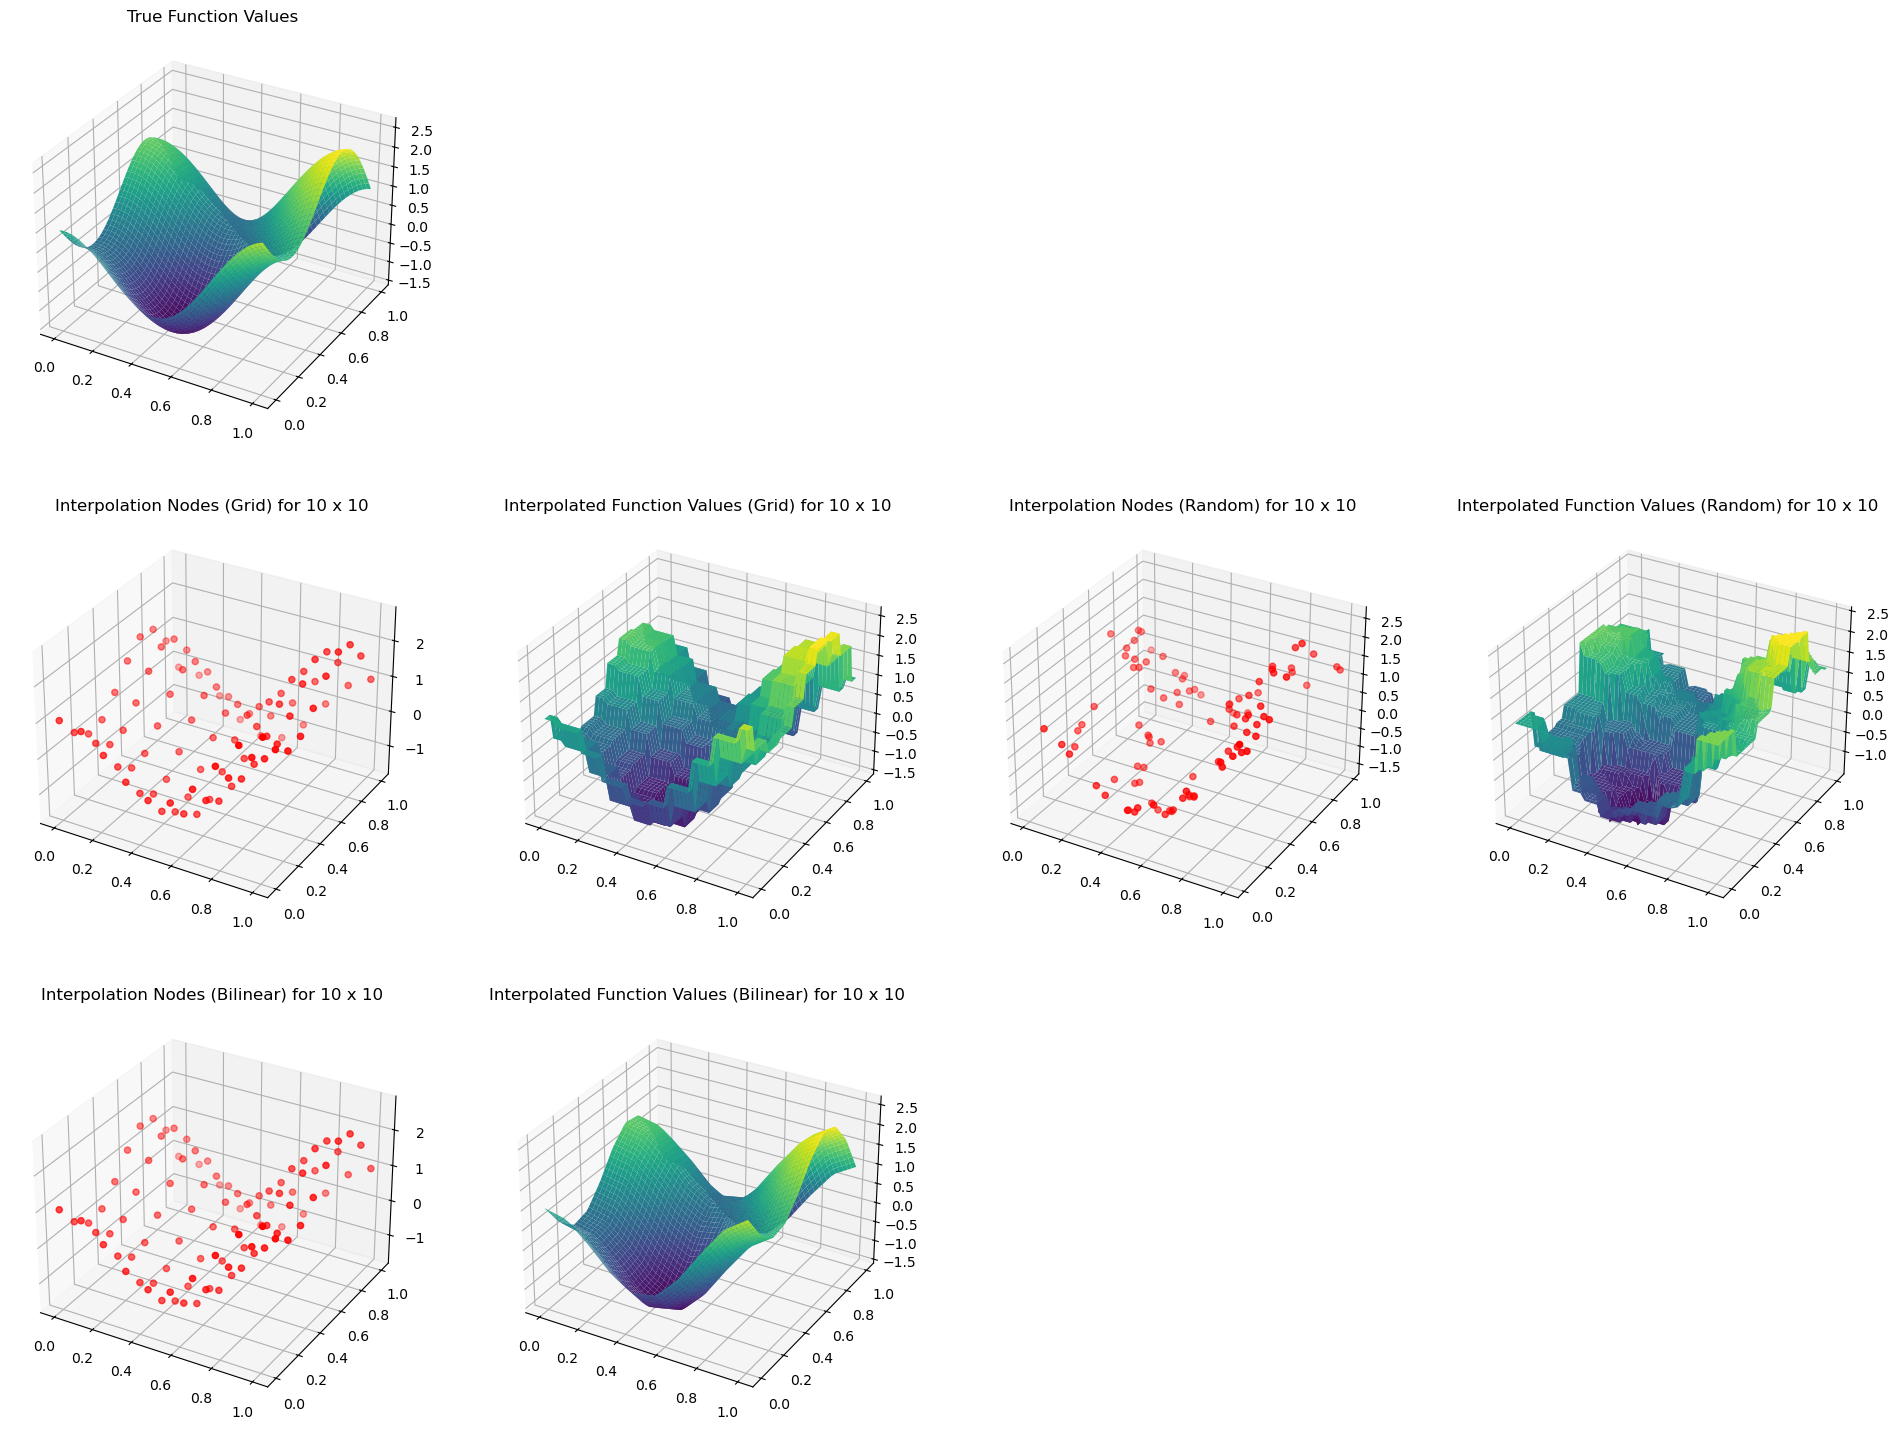

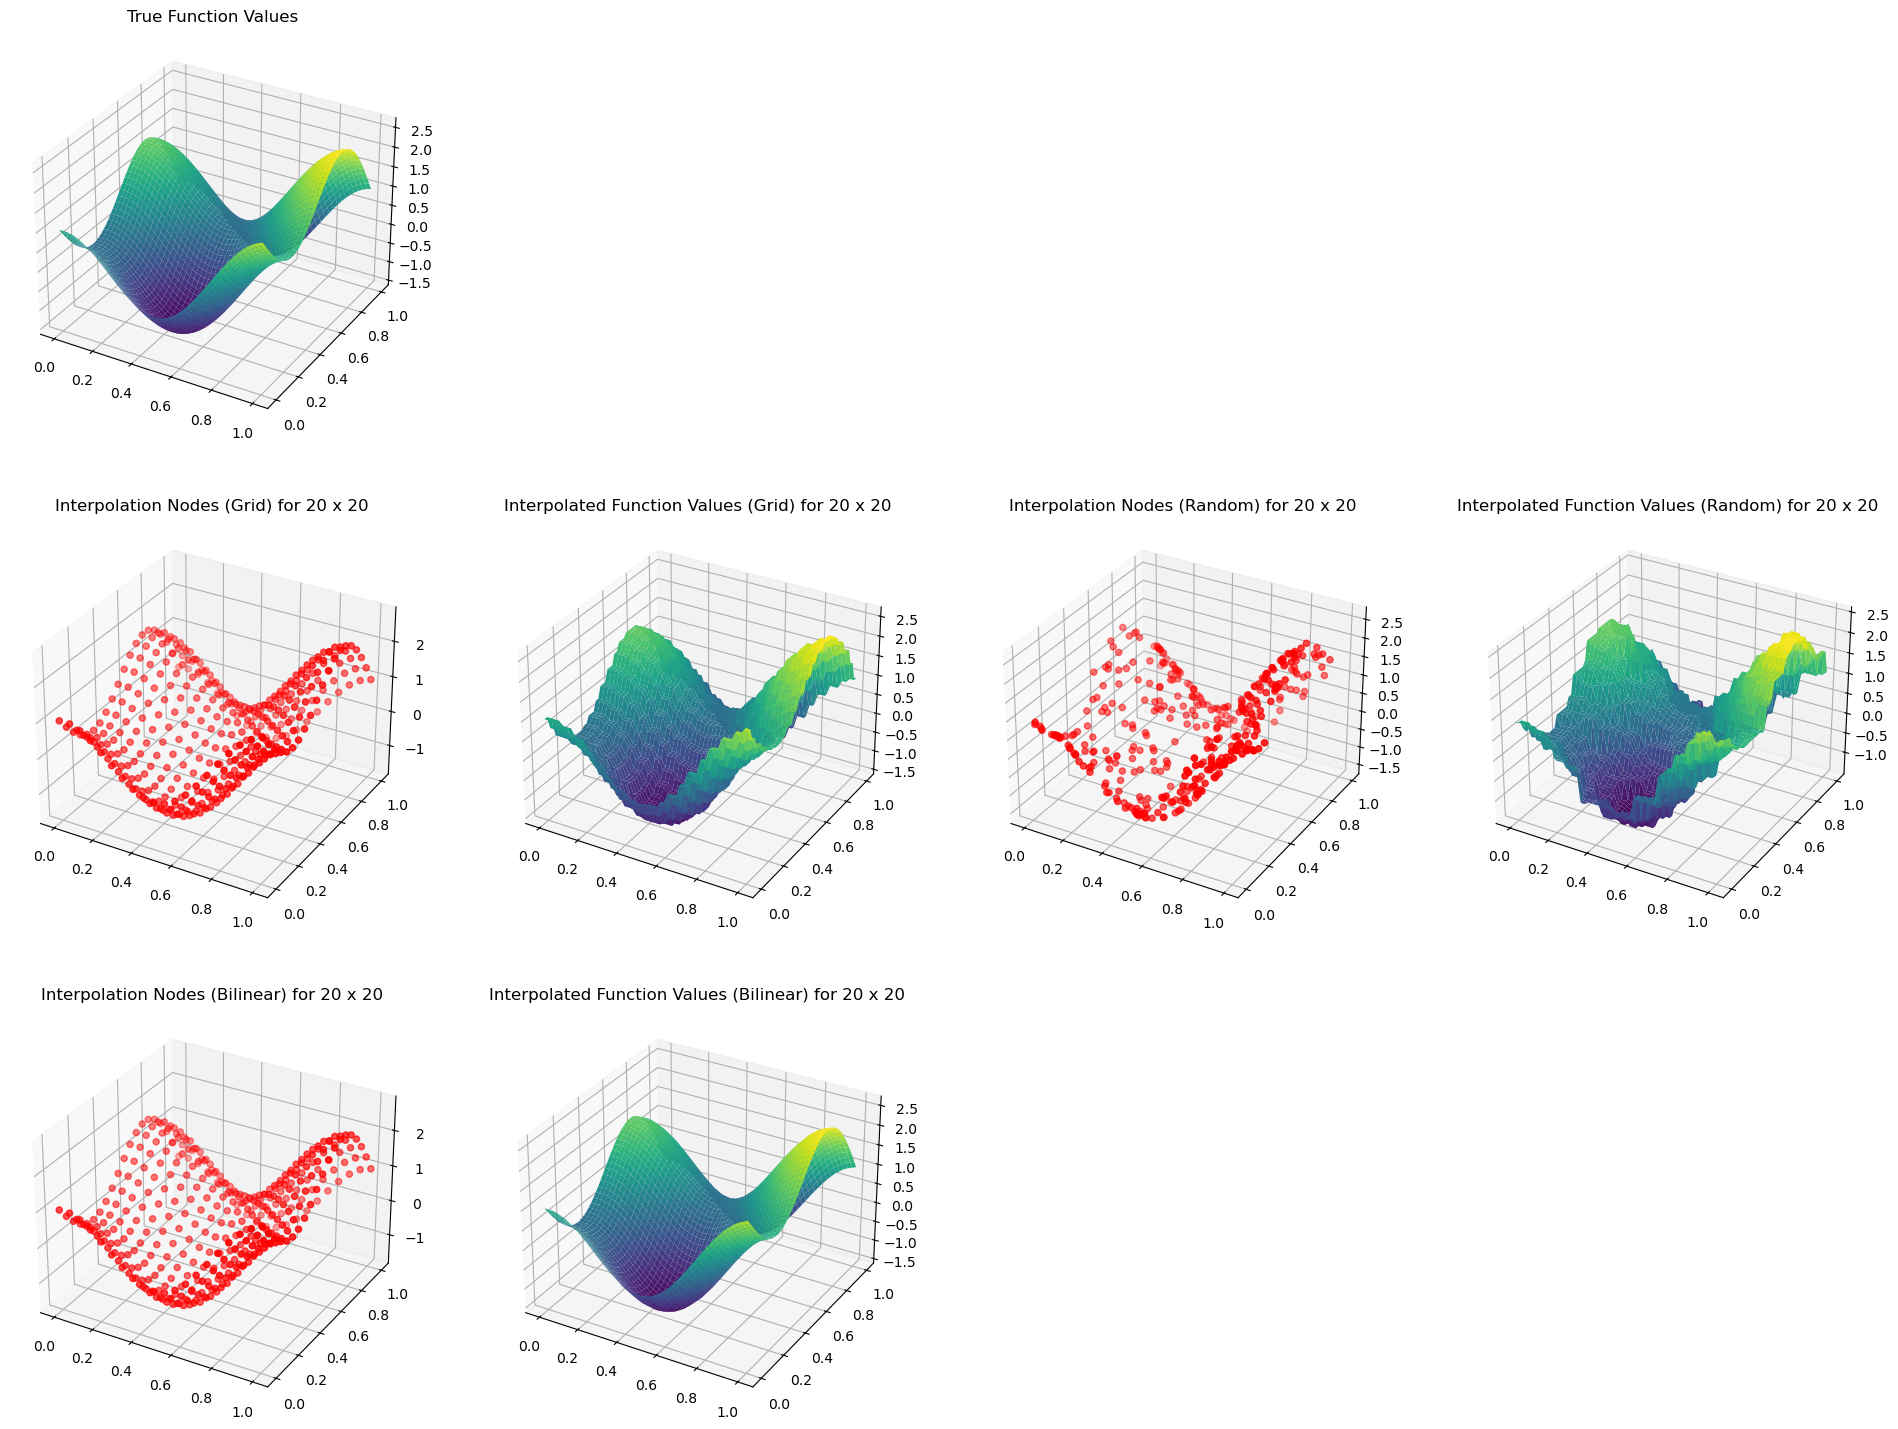

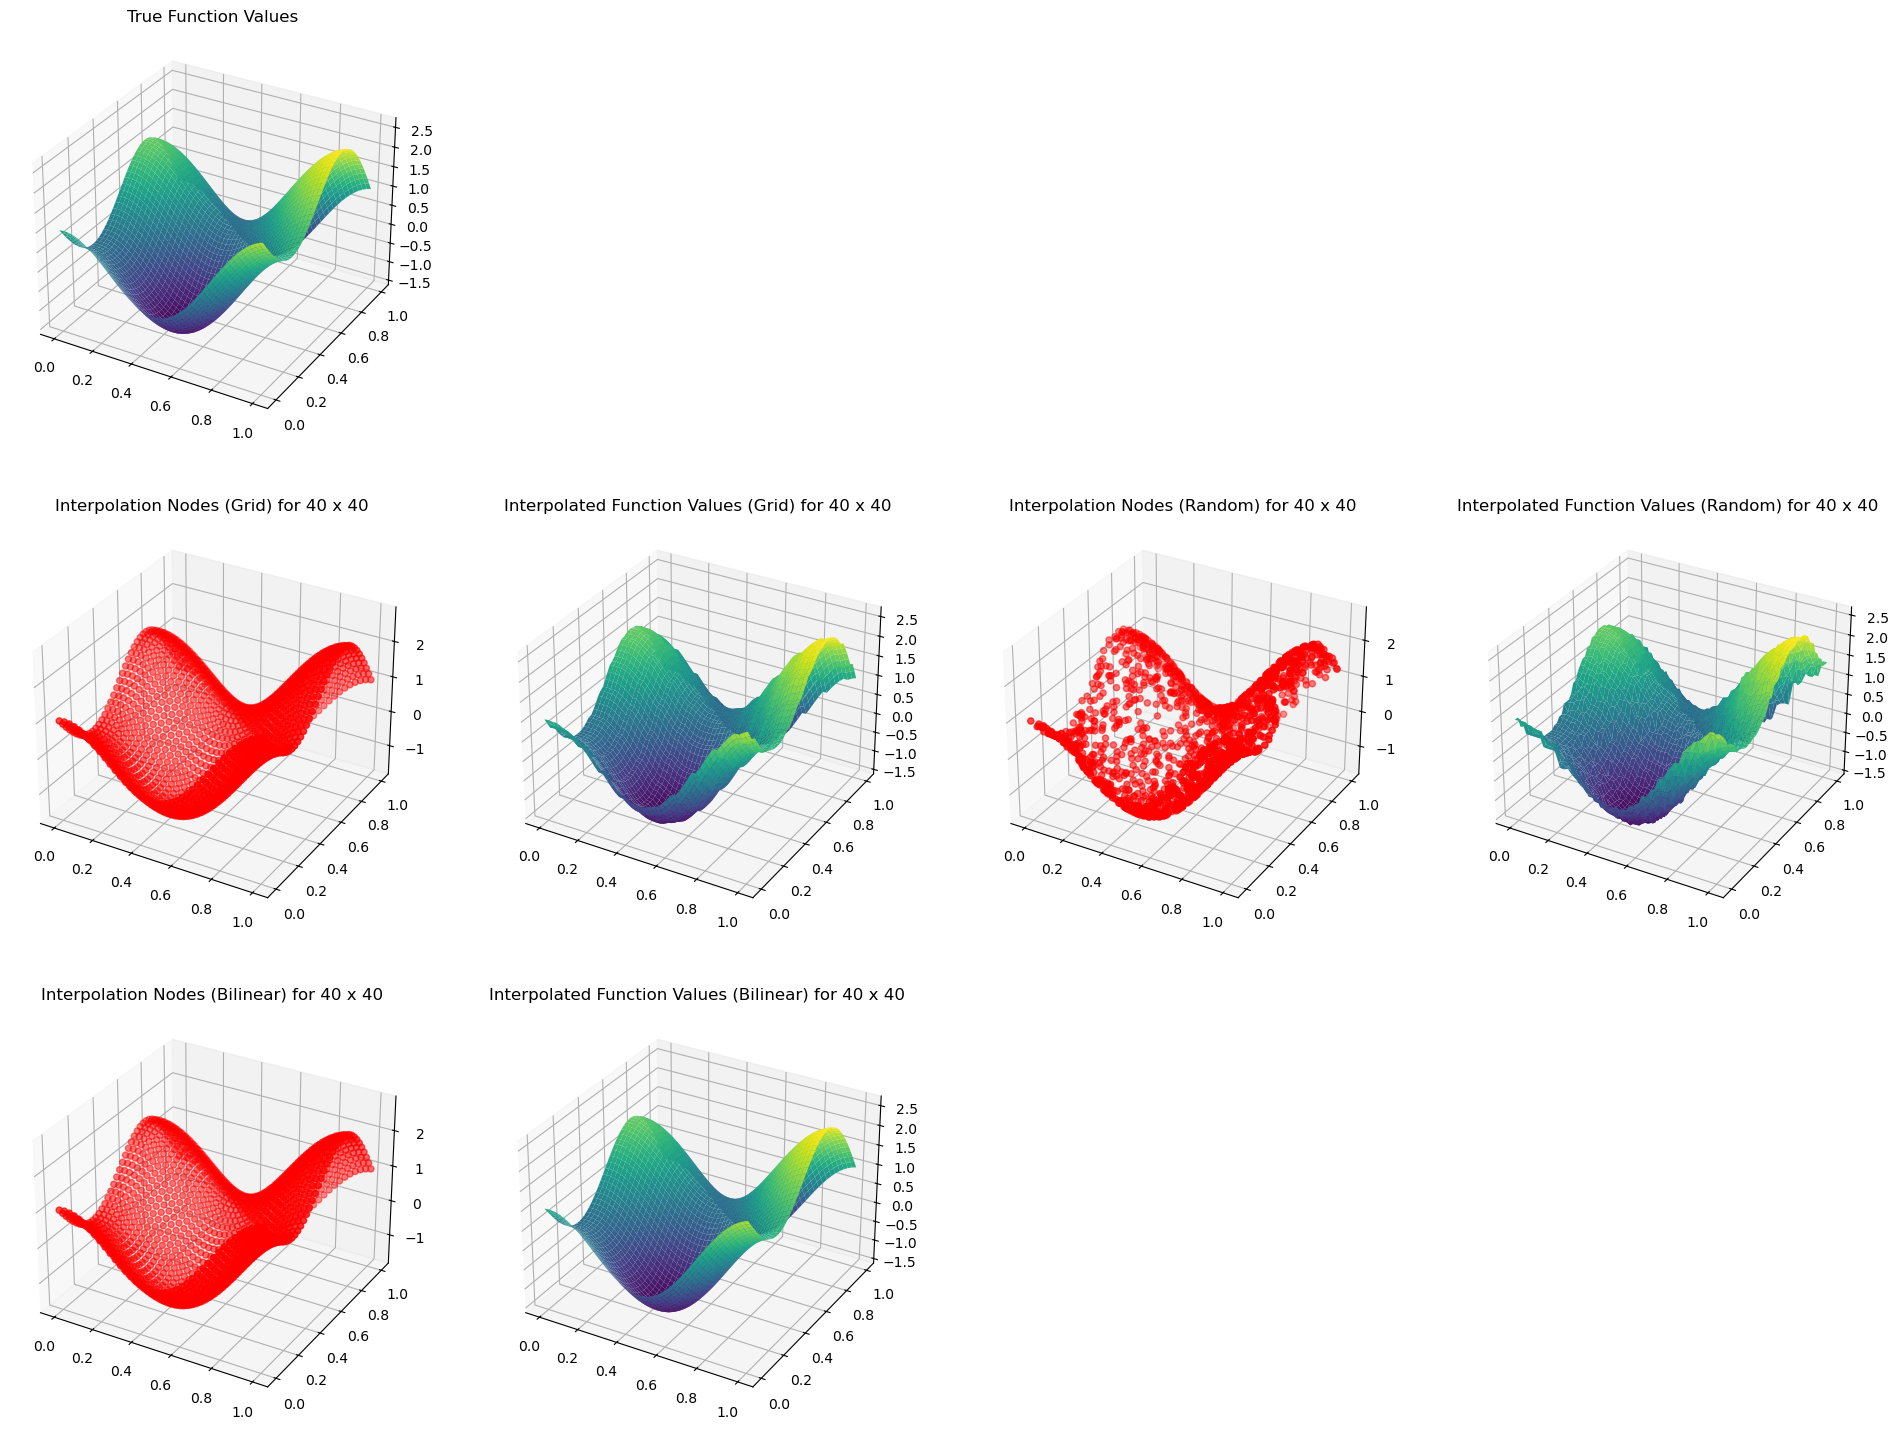

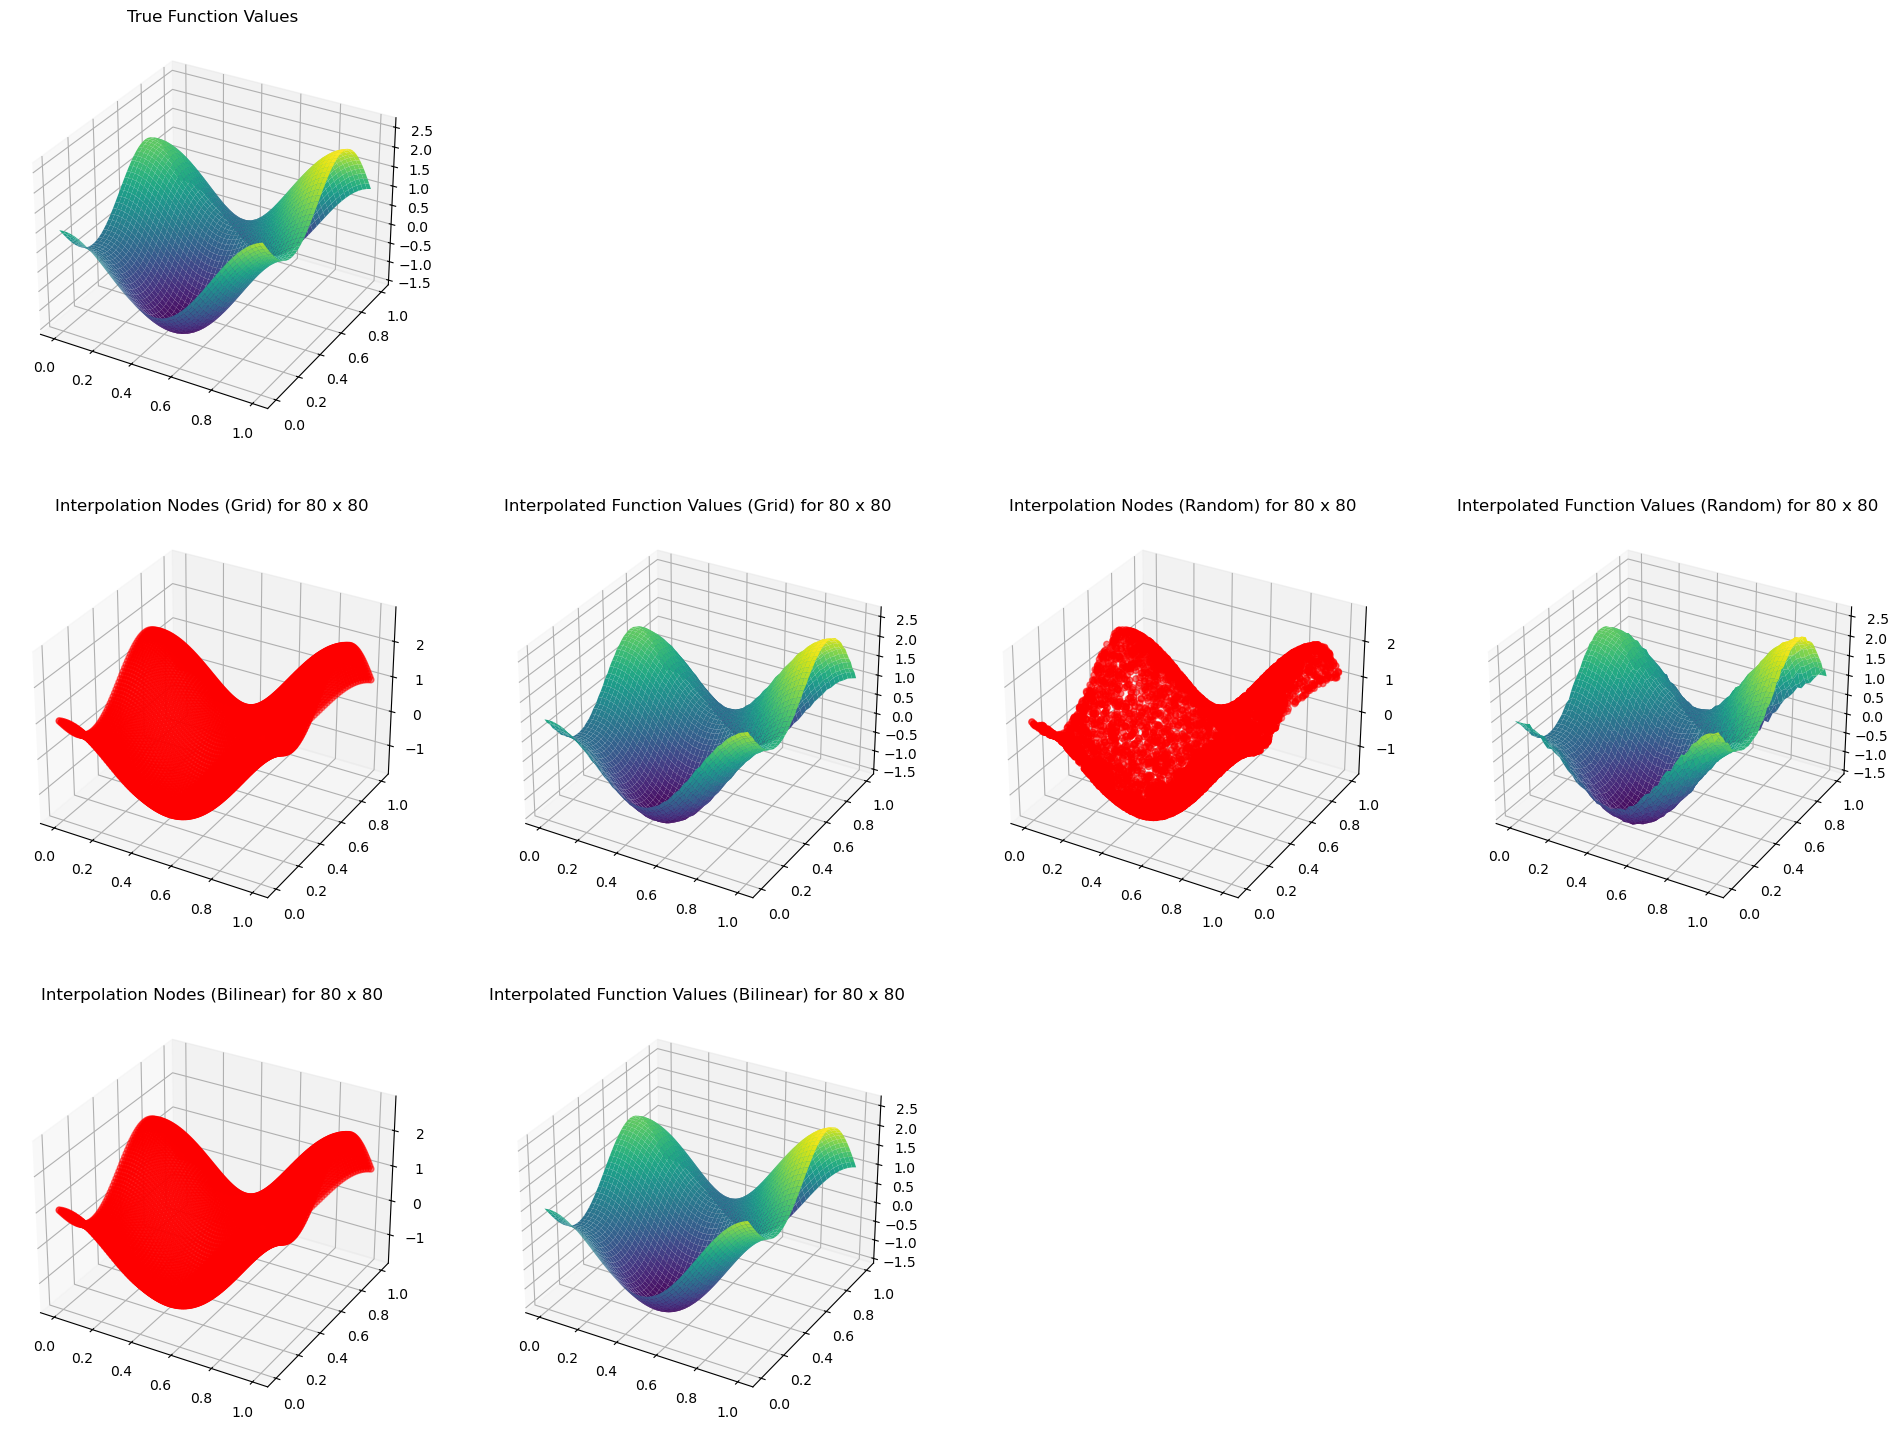

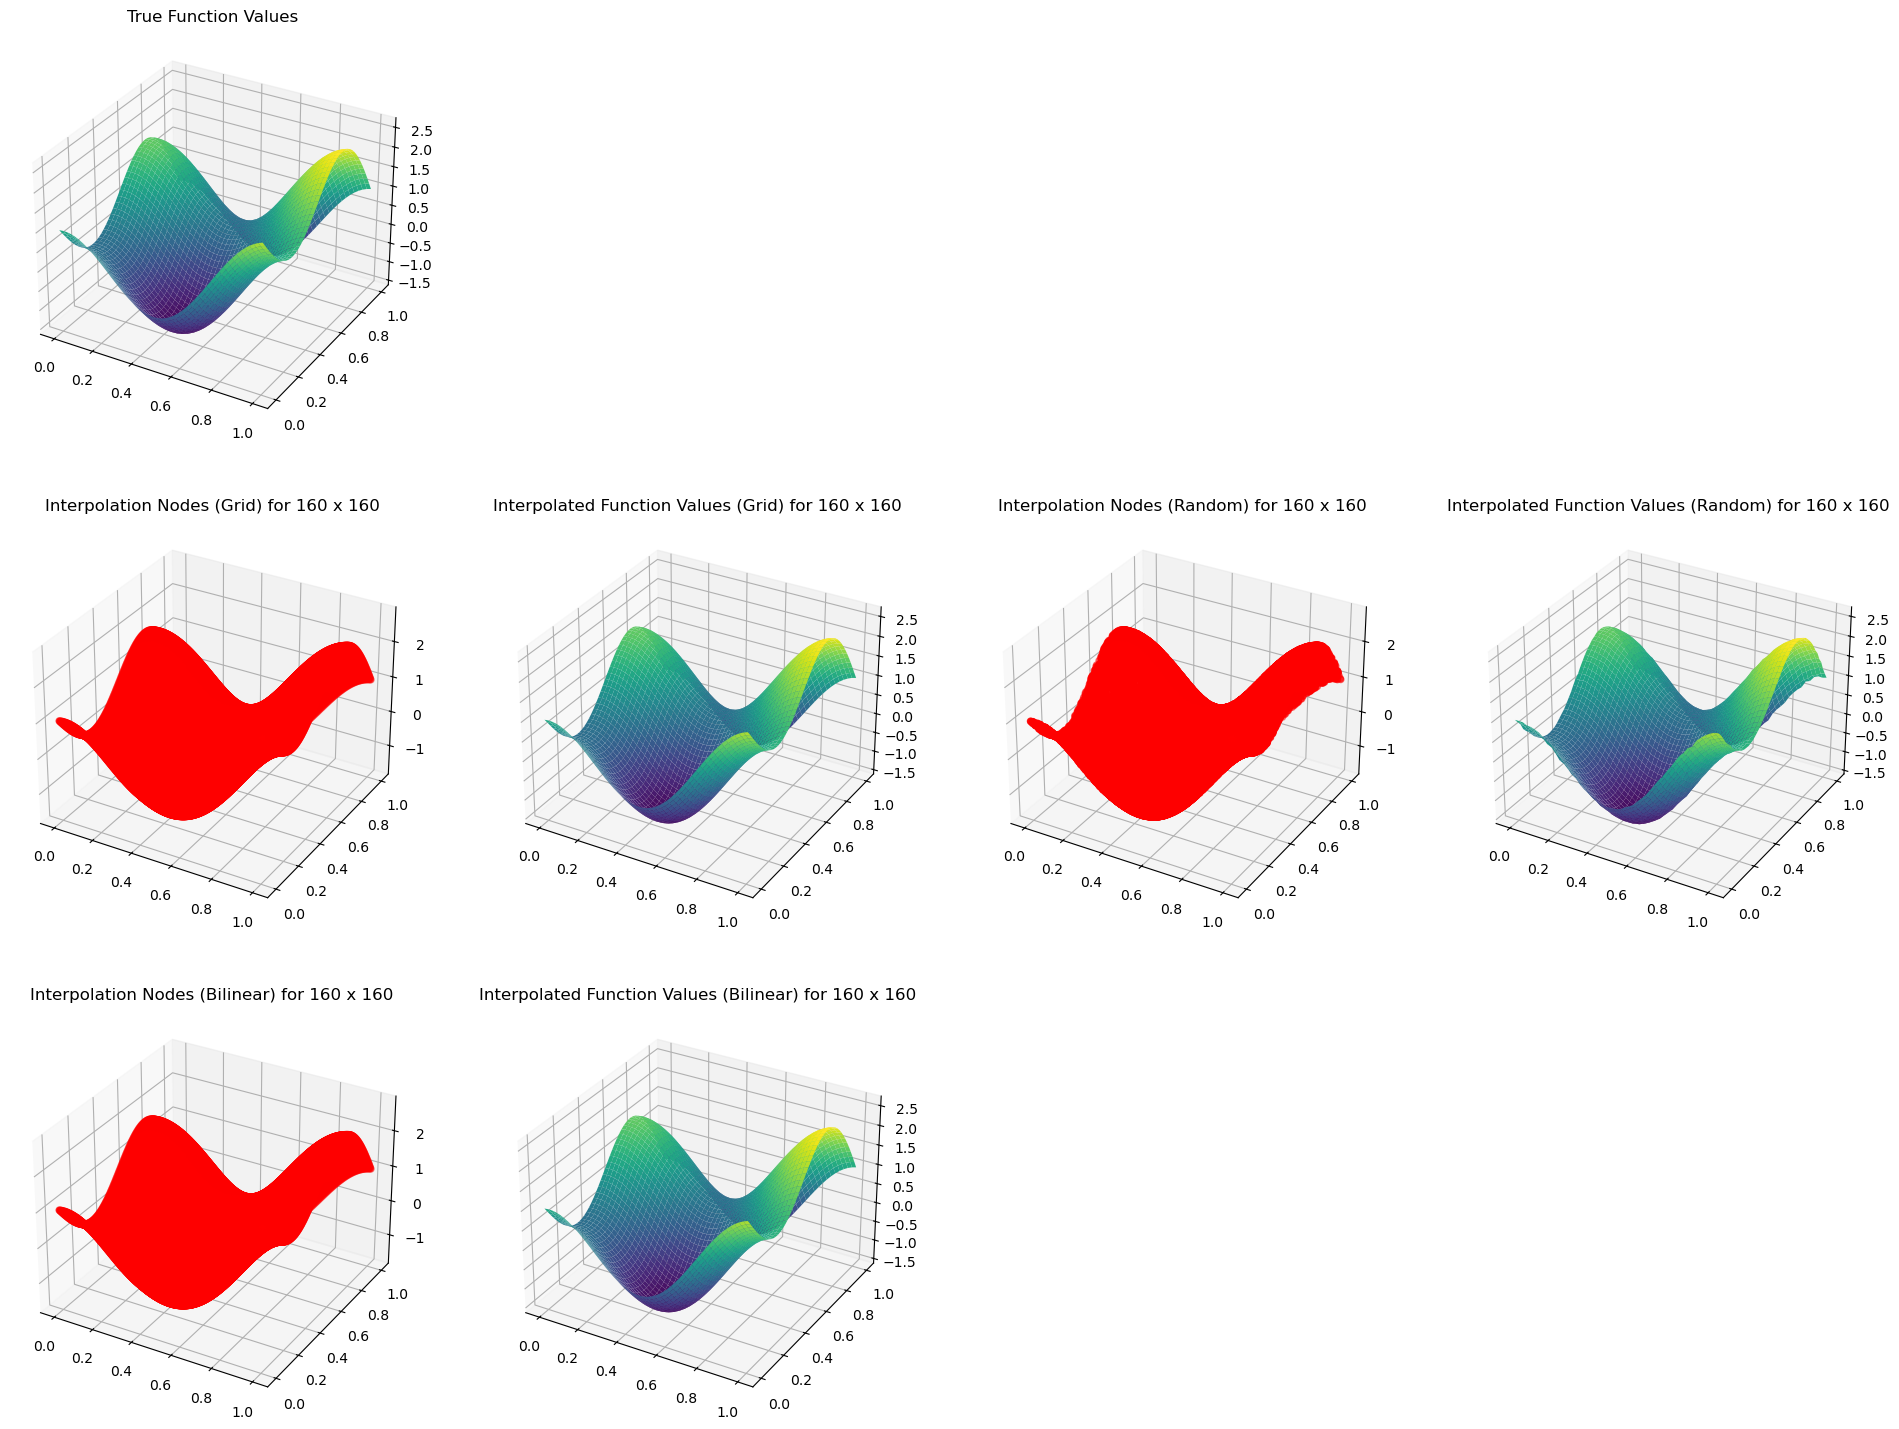

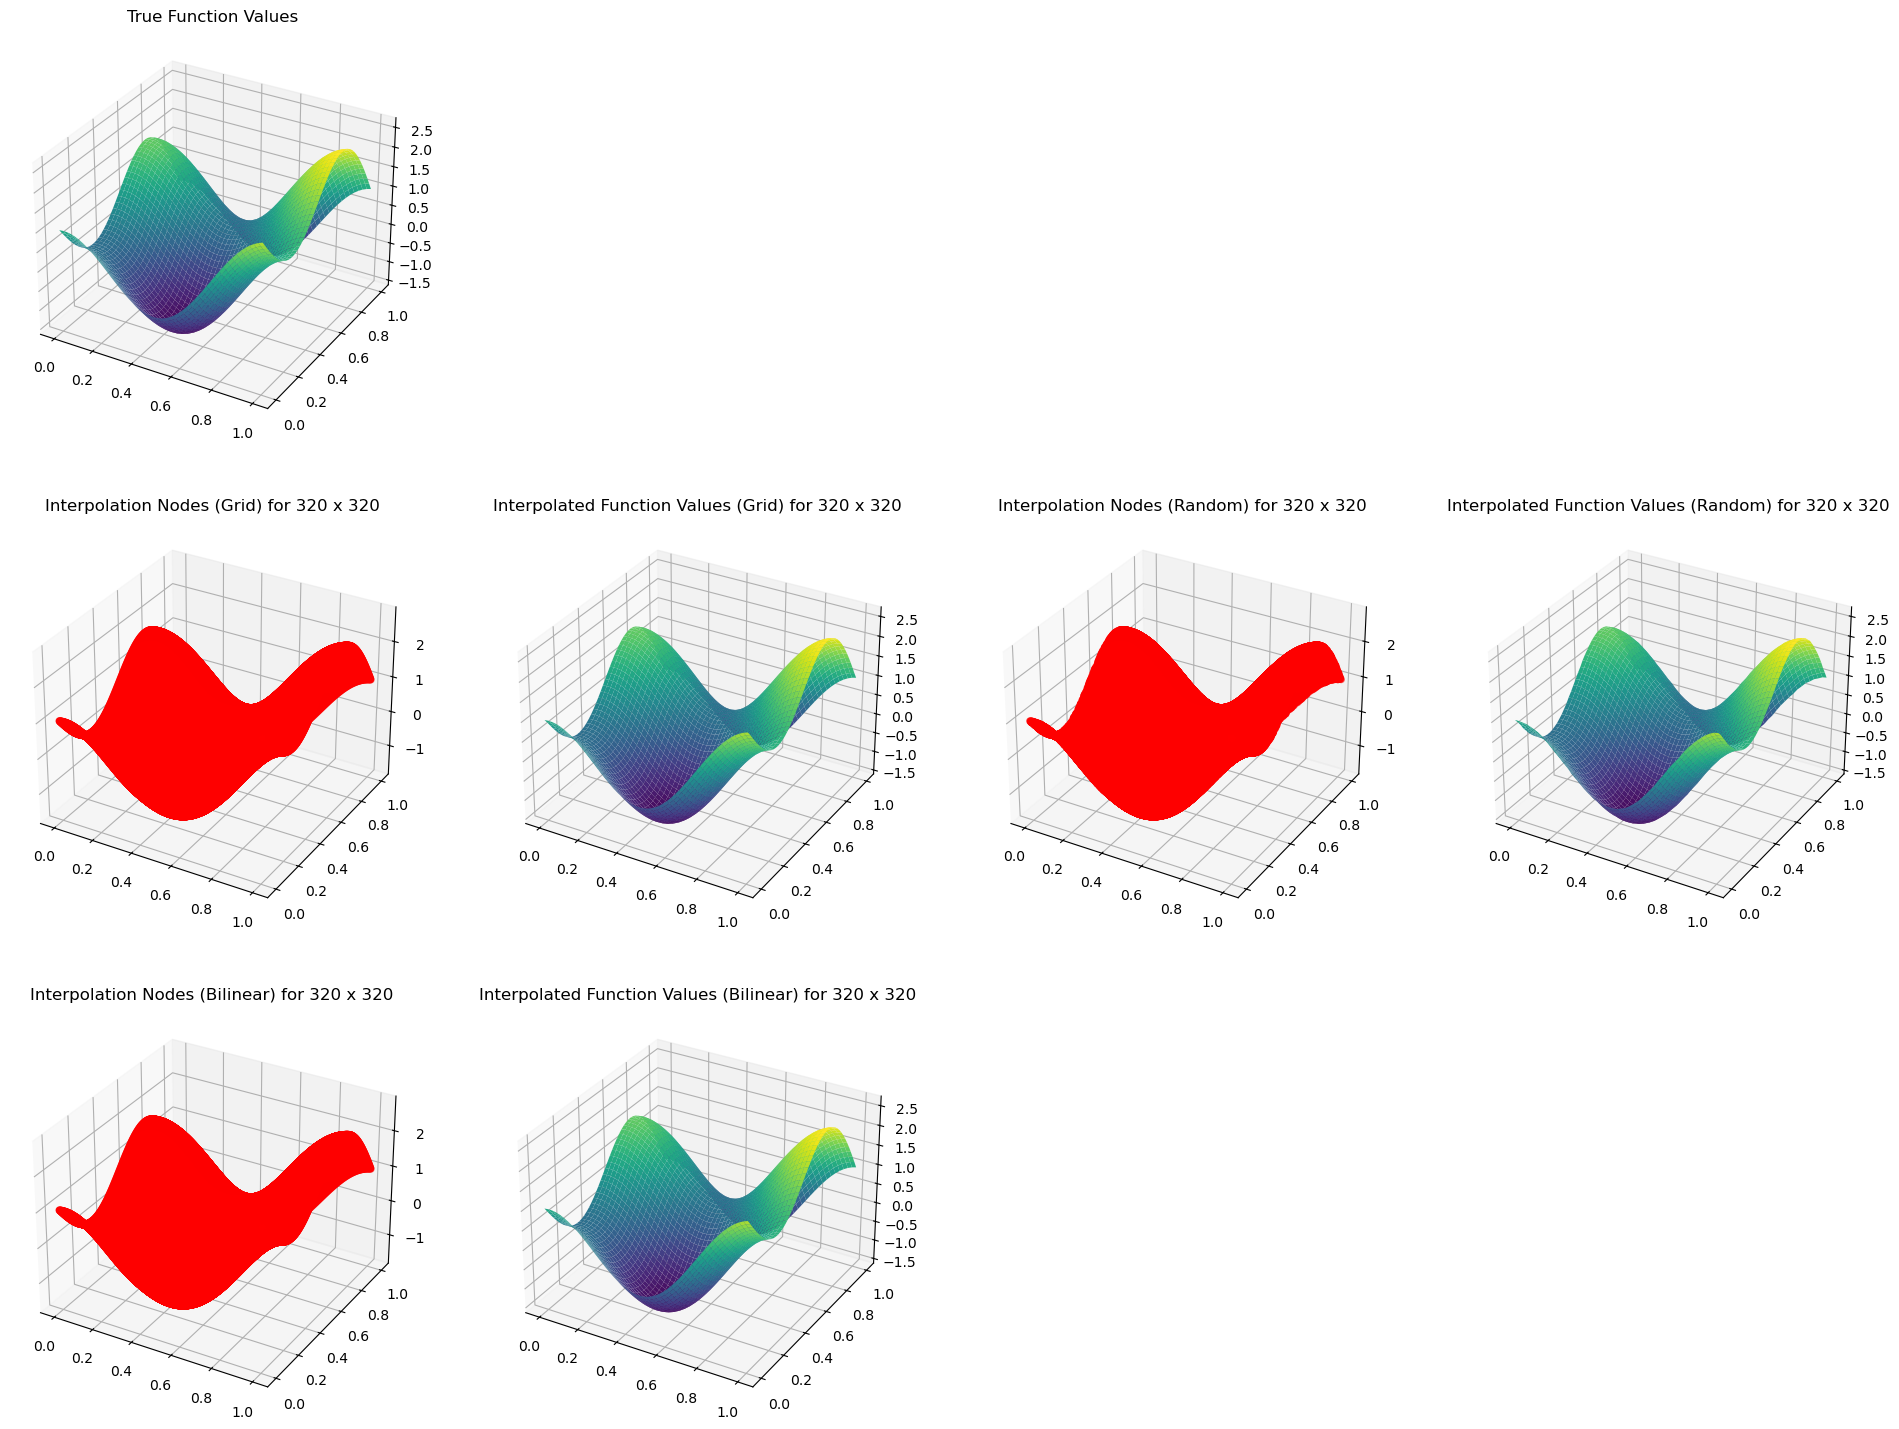

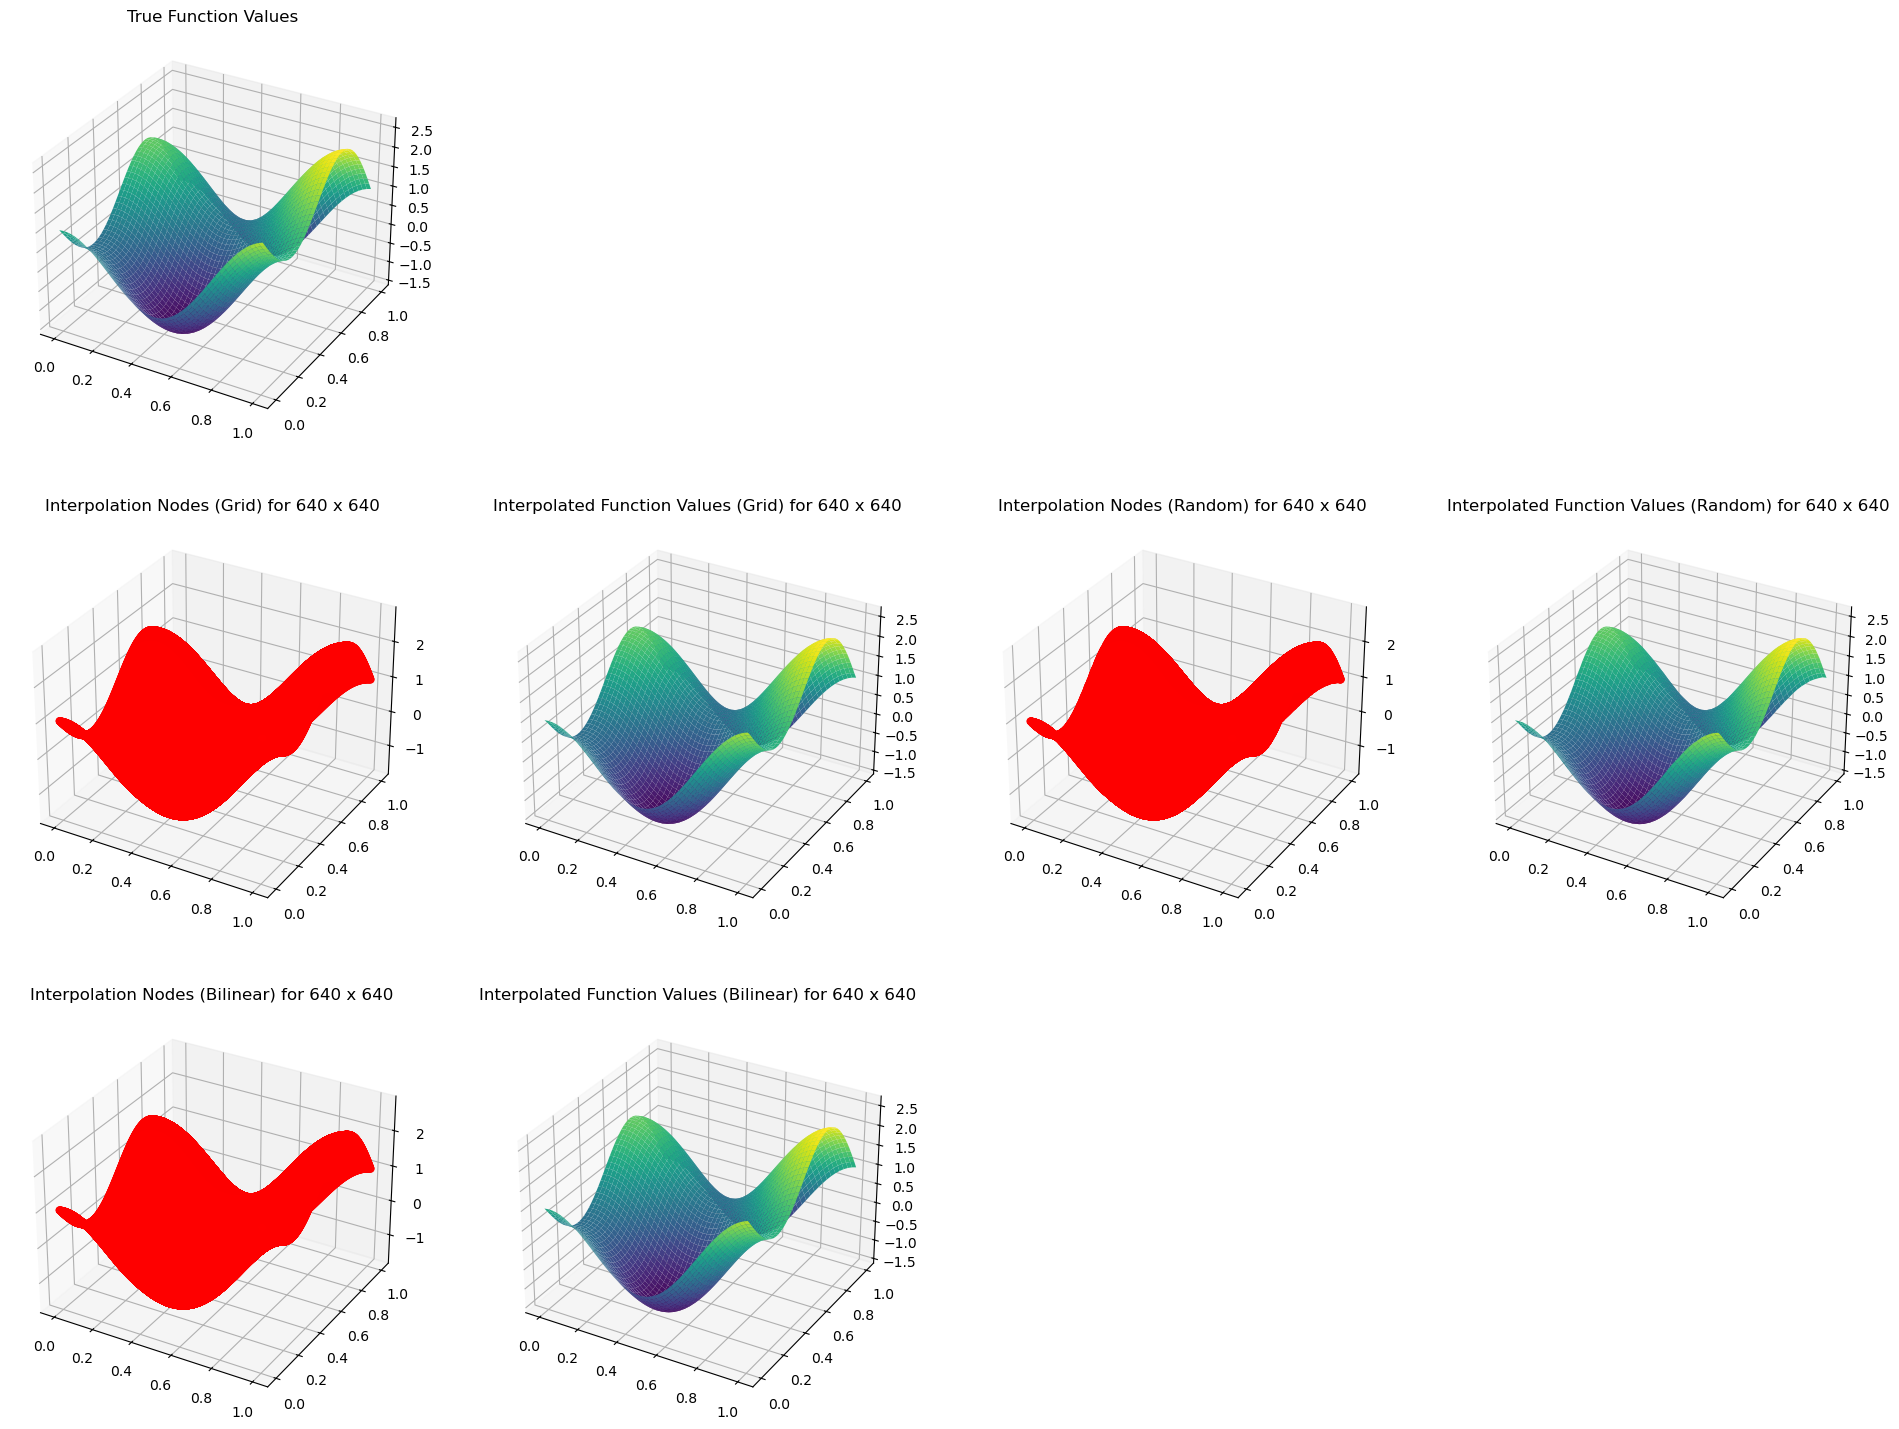

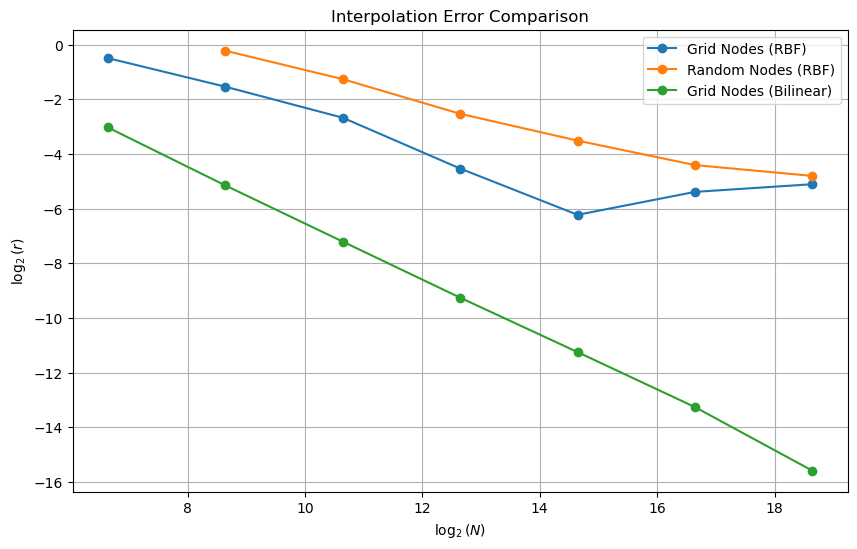

In [20]:
def solve_problem_5():
    n_values = [10, 20, 40, 80, 160, 320, 640]
    errors_grid = []
    errors_random = []
    errors_bilinear = []

    for i in n_values:
        mesh_nodes = generate_mesh(i, i)
        mesh_values = compute_mesh_value(mesh_nodes)
    
        flat_nodes = mesh_nodes.reshape(-1, 2)
        flat_values = mesh_values.flatten()
    
        num_samples = 1000
        test_x, test_y = generate_test_data(num_samples)
    
        interpolator_grid = RadialBasisFunctionInterpolation(flat_nodes, flat_values, dim=2, s1=10, num_samples=num_samples)
    
        visualization_grid = generate_mesh(50, 50)
        visualization_flat_grid = visualization_grid.reshape(-1, 2)
    
        true_values = compute_mesh_value(visualization_grid)
    
        interpolated_values_grid = np.array([interpolator_grid.predict(x) for x in visualization_flat_grid])
        interpolated_values_grid = interpolated_values_grid.reshape(50, 50)
    
        random_nodes, random_values = generate_test_data(i * i)
        interpolator_random = RadialBasisFunctionInterpolation(random_nodes, random_values, dim=2, s1=10, num_samples=num_samples)
    
        interpolated_values_random = np.array([interpolator_random.predict(x) for x in visualization_flat_grid])
        interpolated_values_random = interpolated_values_random.reshape(50, 50)

        interpolator_bilinear = BilinearInterpolation(flat_nodes, flat_values, i, i)

        interpolated_values_bilinear = np.array([interpolator_bilinear.predict(x) for x in visualization_flat_grid])
        interpolated_values_bilinear = interpolated_values_bilinear.reshape(50, 50)

        fig = plt.figure(figsize=(24, 18))
    
        ax1 = fig.add_subplot(341, projection='3d')
        ax1.plot_surface(visualization_grid[:, :, 0], visualization_grid[:, :, 1], true_values, cmap='viridis')
        ax1.set_title('True Function Values')
    
        ax2 = fig.add_subplot(345, projection='3d')
        ax2.scatter(flat_nodes[:, 0], flat_nodes[:, 1], flat_values, c='r', marker='o')
        ax2.set_title(f'Interpolation Nodes (Grid) for {i} x {i}')
    
        ax3 = fig.add_subplot(346, projection='3d')
        ax3.plot_surface(visualization_grid[:, :, 0], visualization_grid[:, :, 1], interpolated_values_grid, cmap='viridis')
        ax3.set_title(f'Interpolated Function Values (Grid) for {i} x {i}')
    
        ax4 = fig.add_subplot(347, projection='3d')
        ax4.scatter(random_nodes[:, 0], random_nodes[:, 1], random_values, c='r', marker='o')
        ax4.set_title(f'Interpolation Nodes (Random) for {i} x {i}')
    
        ax5 = fig.add_subplot(348, projection='3d')
        ax5.plot_surface(visualization_grid[:, :, 0], visualization_grid[:, :, 1], interpolated_values_random, cmap='viridis')
        ax5.set_title(f'Interpolated Function Values (Random) for {i} x {i}')

        ax6 = fig.add_subplot(349, projection='3d')
        ax6.scatter(flat_nodes[:, 0], flat_nodes[:, 1], flat_values, c='r', marker='o')
        ax6.set_title(f'Interpolation Nodes (Bilinear) for {i} x {i}')

        ax7 = fig.add_subplot(3, 4, 10, projection='3d')
        ax7.plot_surface(visualization_grid[:, :, 0], visualization_grid[:, :, 1], interpolated_values_bilinear, cmap='viridis')
        ax7.set_title(f'Interpolated Function Values (Bilinear) for {i} x {i}')
    
        plt.show()

        true_values_flat = true_values.flatten()
        error_grid = np.max(np.abs(interpolated_values_grid.flatten() - true_values_flat))
        error_random = np.max(np.abs(interpolated_values_random.flatten() - true_values_flat))
        error_bilinear = np.max(np.abs(interpolated_values_bilinear.flatten() - true_values_flat))
        errors_grid.append(error_grid)
        errors_random.append(error_random)
        errors_bilinear.append(error_bilinear)

    log2_n = np.log2(np.array(n_values)**2)
    log2_errors_grid = np.log2(errors_grid)
    log2_errors_random = np.log2(errors_random)
    log2_errors_bilinear = np.log2(errors_bilinear)

    plt.figure(figsize=(10, 6))
    plt.plot(log2_n, log2_errors_grid, label='Grid Nodes (RBF)', marker='o')
    plt.plot(log2_n, log2_errors_random, label='Random Nodes (RBF)', marker='o')
    plt.plot(log2_n, log2_errors_bilinear, label='Grid Nodes (Bilinear)', marker='o')
    plt.xlabel('$\log_2(N)$')
    plt.ylabel('$\log_2(r)$')
    plt.title('Interpolation Error Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

solve_problem_5()